<a href="https://colab.research.google.com/github/anas1IA/Analysis-of-Bank-Debit-Collections/blob/main/first_project_change).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from mlxtend.preprocessing import minmax_scaling
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
# separate dataset into train and test
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2



## the transformation of data from a text file to a CSV


In [4]:
data_1year=pd.read_csv('csv_result-1year.csv')
data_2year=pd.read_csv('csv_result-2year .csv')
data_3year=pd.read_csv('csv_result-3year.csv')
data_4year=pd.read_csv('csv_result-4year.csv')
data_5year=pd.read_csv('csv_result-5year.csv')
all_data = pd.concat([data_1year, data_2year, data_3year, data_4year, data_5year], ignore_index=True)
all_data

<ipython-input-4-9e51fdb42de8>:2: DtypeWarning: Columns (1,2,3,6,7,9,10,11,14,18,22,24,25,29,35,36,38,48,51,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_2year=pd.read_csv('csv_result-2year .csv')
<ipython-input-4-9e51fdb42de8>:3: DtypeWarning: Columns (15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_3year=pd.read_csv('csv_result-3year.csv')
<ipython-input-4-9e51fdb42de8>:4: DtypeWarning: Columns (1,2,3,6,7,8,10,11,14,15,16,17,18,22,24,25,26,29,34,35,36,38,48,50,51,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  data_4year=pd.read_csv('csv_result-4year.csv')


id     Attr1    Attr2      Attr3    Attr4    Attr5     Attr6  \
0         1   0.20055  0.37951    0.39641   2.0472   32.351   0.38825   
1         2   0.20912  0.49988    0.47225   1.9447   14.786         0   
2         3   0.24866  0.69592    0.26713   1.5548  -1.1523         0   
3         4  0.081483  0.30734    0.45879   2.4928   51.952   0.14988   
4         5   0.18732  0.61323     0.2296   1.4063  -7.3128   0.18732   
...     ...       ...      ...        ...      ...      ...       ...   
43400  5906  0.012898  0.70621   0.038857   1.1722  -18.907         0   
43401  5907  -0.57805  0.96702   -0.80085  0.16576  -67.365  -0.57805   
43402  5908  -0.17905   1.2553   -0.27599  0.74554  -120.44  -0.17905   
43403  5909  -0.10886  0.74394   0.015449   1.0878  -17.003  -0.10886   
43404  5910  -0.10537  0.53629  -0.045578  0.91478  -56.068  -0.10537   

          Attr7     Attr8    Attr9  ...    Attr56    Attr57   Attr58  \
0       0.24976    1.3305   1.1389  ...   0.12196   0.39718  0.87804   
1       0.25834   0.99601   1.6996  ...    0.1213   0.42002    0.853   
2       0.30906   0.43695    1.309  ...   0.24114   0.81774  0.76599   
3      0.092704    1.8661   1.0571  ...  0.054015   0.14207  0.94598   
4       0.18732    0.6307   1.1559  ...   0.13485   0.48431  0.86515   
...         ...       ...      ...  ...       ...       ...      ...   
43400  0.013981     0.416   1.6768  ...  0.020169  0.043904   1.0122   
43401  -0.57805  -0.40334  0.93979  ... -0.064073     1.482   1.0641   
43402  -0.15493  -0.26018   1.1749  ...   0.14888   0.54824  0.85112   
43403  -0.10918   0.12531  0.84516  ...   -0.1832   -1.1677   1.1832   
43404  -0.10994    0.8646   0.9504  ... -0.052186  -0.22725   1.0522   

          Attr59  Attr60  Attr61  Attr62  Attr63   Attr64 class  
0       0.001924   8.416  5.1372  82.658  4.4158   7.4277     0  
1              0  4.1486  3.2732  107.35     3.4   60.987     0  
2        0.69484  4.9909   3.951  134.27  2.7185   5.2078     0  
3              0  4.5746  3.6147  86.435  4.2228   5.5497     0  
4        0.12444  6.3985  4.3158  127.21  2.8692    7.898     0  
...          ...     ...     ...     ...     ...      ...   ...  
43400     1.2594  13.472  12.432  49.117  7.4313   2.2799     1  
43401  -0.018084  110.72  44.759   81.22   4.494   5.1305     1  
43402   -0.52243  9.8526  3.4892  207.87  1.7559   9.9527     1  
43403     6.0924  13.886  6.0769  83.122  4.3911  0.95575     1  
43404   0.003196  7.7332  4.7174  136.85  2.6672   2.7927     1  

[43405 rows x 66 columns]

In [5]:
formulas = ["id",
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]


In [6]:
all_data.columns=formulas
all_data

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
43400  5906                  0.012898                          0.70621   
43401  5907                  -0.57805                          0.96702   
43402  5908                  -0.17905                           1.2553   
43403  5909                  -0.10886                          0.74394   
43404  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   


## Data Cleaning


###Handling Missing Values


In [7]:
all_data_rest = all_data.astype(str)
all_data.replace("?", float('nan'), inplace=True)


In [8]:
all_data_rest

id net profit / total assets total liabilities / total assets  \
0         1                   0.20055                          0.37951   
1         2                   0.20912                          0.49988   
2         3                   0.24866                          0.69592   
3         4                  0.081483                          0.30734   
4         5                   0.18732                          0.61323   
...     ...                       ...                              ...   
43400  5906                  0.012898                          0.70621   
43401  5907                  -0.57805                          0.96702   
43402  5908                  -0.17905                           1.2553   
43403  5909                  -0.10886                          0.74394   
43404  5910                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   


In [9]:
all_data_reset = all_data.drop("id", axis=1)
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
43400                  0.012898                          0.70621   
43401                  -0.57805                          0.96702   
43402                  -0.17905                           1.2553   
43403                  -0.10886                          0.74394   
43404                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   
43404                         -0.10537            -0.10994   

      

In [10]:
missing_values_count=all_data_reset.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:]

net profit / total assets                                                                                              8
total liabilities / total assets                                                                                       8
working capital / total assets                                                                                         8
current assets / short-term liabilities                                                                              134
(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365     89
                                                                                                                    ... 
sales / receivables                                                                                                  102
(short-term liabilities * 365) / sales                                                                               127
sales / short-term liabilities  

In [11]:
total_cells = np.product(all_data_reset.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

1.4646309801245867


<Axes: >

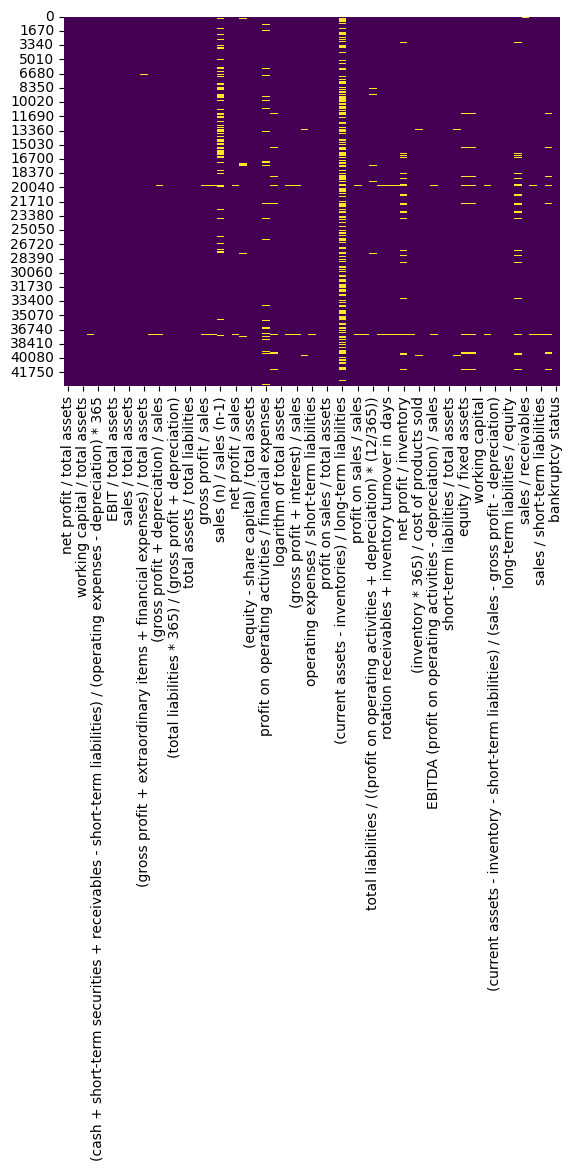

In [12]:
sns.heatmap(all_data_reset.isnull(),cbar=False,cmap='viridis')

In [13]:
all_data_reset

net profit / total assets total liabilities / total assets  \
0                       0.20055                          0.37951   
1                       0.20912                          0.49988   
2                       0.24866                          0.69592   
3                      0.081483                          0.30734   
4                       0.18732                          0.61323   
...                         ...                              ...   
43400                  0.012898                          0.70621   
43401                  -0.57805                          0.96702   
43402                  -0.17905                           1.2553   
43403                  -0.10886                          0.74394   
43404                  -0.10537                          0.53629   

      working capital / total assets current assets / short-term liabilities  \
0                            0.39641                                  2.0472   
1                            0.47225                                  1.9447   
2                            0.26713                                  1.5548   
3                            0.45879                                  2.4928   
4                             0.2296                                  1.4063   
...                              ...                                     ...   
43400                       0.038857                                  1.1722   
43401                       -0.80085                                 0.16576   
43402                       -0.27599                                 0.74554   
43403                       0.015449                                  1.0878   
43404                      -0.045578                                 0.91478   

      (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                                 32.351                                                                  
1                                                 14.786                                                                  
2                                                -1.1523                                                                  
3                                                 51.952                                                                  
4                                                -7.3128                                                                  
...                                                  ...                                                                  
43400                                            -18.907                                                                  
43401                                            -67.365                                                                  
43402                                            -120.44                                                                  
43403                                            -17.003                                                                  
43404                                            -56.068                                                                  

      retained earnings / total assets EBIT / total assets  \
0                              0.38825             0.24976   
1                                    0             0.25834   
2                                    0             0.30906   
3                              0.14988            0.092704   
4                              0.18732             0.18732   
...                                ...                 ...   
43400                                0            0.013981   
43401                         -0.57805            -0.57805   
43402                         -0.17905            -0.15493   
43403                         -0.10886            -0.10918   
43404                         -0.10537            -0.10994   

      

##Handling duplicate data


In [14]:
#check if data has duplicates values
duplicates = all_data_reset.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
43400    False
43401    False
43402    False
43403    False
43404    False
Length: 43405, dtype: bool


#####We note that duplicates do not exist


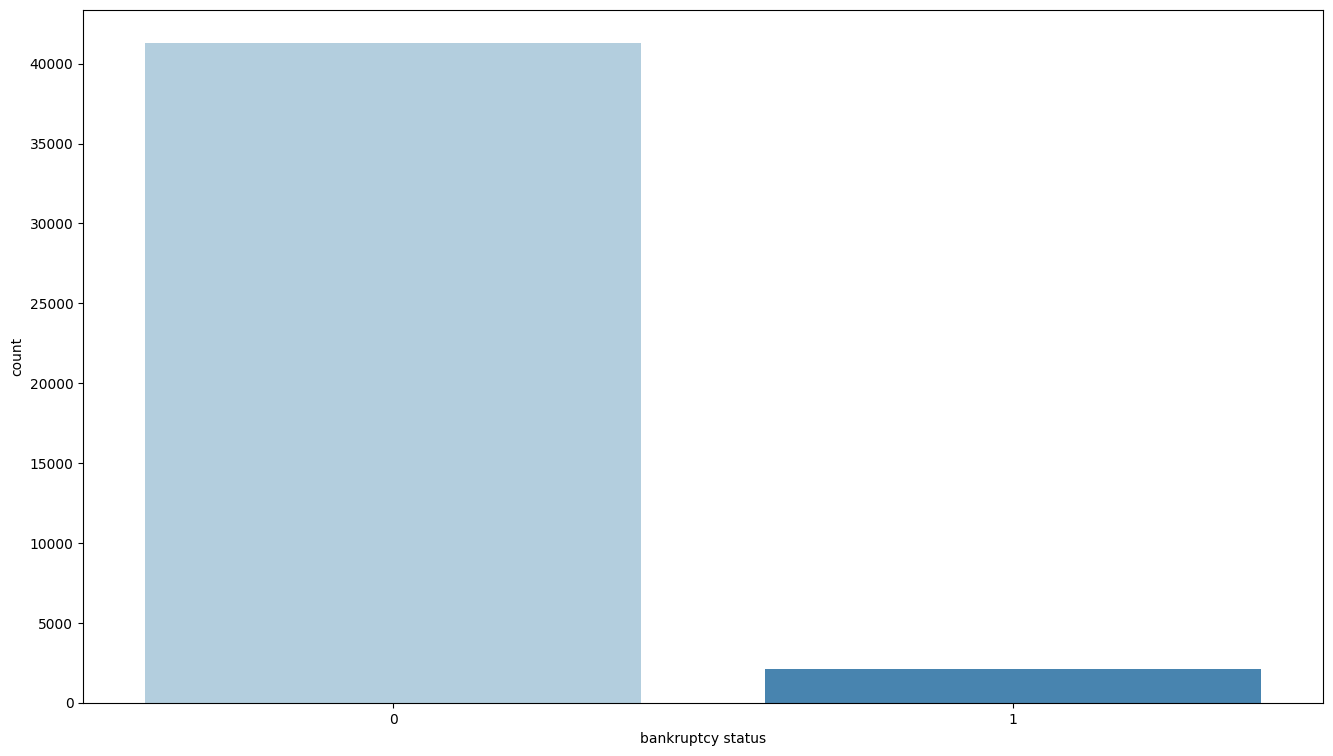

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.countplot(x ='bankruptcy status',data = all_data_reset,palette ='Blues' )
plt.show()

In [16]:
all_data_reset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43405 entries, 0 to 43404
Data columns (total 65 columns):
 #   Column                                                                                                             Non-Null Count  Dtype 
---  ------                                                                                                             --------------  ----- 
 0   net profit / total assets                                                                                          43397 non-null  object
 1   total liabilities / total assets                                                                                   43397 non-null  object
 2   working capital / total assets                                                                                     43397 non-null  object
 3   current assets / short-term liabilities                                                                            43271 non-null  object
 4   (cash + short-term securitie

In [17]:
all_data_reset.shape

(43405, 65)

#Scaling and  Normalization


In [18]:
scaler = MinMaxScaler()

# Fit and transform the entire DataFrame
data_scaled = scaler.fit_transform(all_data_reset)
# data_scaled is now a numpy array with scaled values

# Convert the numpy array back to a DataFrame with the original columns
data_scaled = pd.DataFrame(data_scaled, columns=all_data_reset.columns)
data_scaled.head()

net profit / total assets  total liabilities / total assets  \
0                   0.831450                          0.472949   
1                   0.831466                          0.473081   
2                   0.831536                          0.473296   
3                   0.831237                          0.472870   
4                   0.831426                          0.473206   

   working capital / total assets  current assets / short-term liabilities  \
0                        0.945033                                 0.000046   
1                        0.945182                                 0.000044   
2                        0.944778                                 0.000037   
3                        0.945156                                 0.000054   
4                        0.944705                                 0.000034   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                           0.904960                                                                   
1                                           0.904959                                                                   
2                                           0.904958                                                                   
3                                           0.904962                                                                   
4                                           0.904957                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                          0.483805             0.443752   
1                          0.483436             0.443759   
2                          0.483436             0.443803   
3                          0.483578             0.443617   
4                          0.483614             0.443698   

   book value of equity / total liabilities  sales / total assets  \
0                                  0.002664              0.000476   
1                                  0.002658              0.000533   
2                                  0.002648              0.000493   
3                                  0.002674              0.000467   
4                                  0.002651              0.000477   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0               0.304174  ...                                 0.999736   
1               0.304169  ...                                 0.999736   
2               0.304046  ...                                 0.999736   
3               0.304217  ...                                 0.999736   
4               0.304099  ...                                 0.999736   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                           0.751235                                               
1                                           0.751246                                               
2                                           0.751425                                               
3                                           0.751120                                               
4                                           0.751274                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.00018                        0.013563   
1                    0.00018                        0.013563   
2                    0.00018                        0.013592   
3                    0.00018                        0.013563   
4                    0.00018                        0.013568   

   sales / inventory  sales / receivables  \
0           0.000004             0.000165   
1           0.000003             0.000147   
2           0.000004             0.000154   
3           0.000004         

In [19]:
formula= [
    "net profit / total assets",
    "total liabilities / total assets",
    "working capital / total assets",
    "current assets / short-term liabilities",
    "(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365",
    "retained earnings / total assets",
    "EBIT / total assets",
    "book value of equity / total liabilities",
    "sales / total assets",
    "equity / total assets",
    "(gross profit + extraordinary items + financial expenses) / total assets",
    "gross profit / short-term liabilities",
    "(gross profit + depreciation) / sales",
    "(gross profit + interest) / total assets",
    "(total liabilities * 365) / (gross profit + depreciation)",
    "(gross profit + depreciation) / total liabilities",
    "total assets / total liabilities",
    "gross profit / total assets",
    "gross profit / sales",
    "(inventory * 365) / sales",
    "sales (n) / sales (n-1)",
    "profit on operating activities / total assets",
    "net profit / sales",
    "gross profit (in 3 years) / total assets",
    "(equity - share capital) / total assets",
    "(net profit + depreciation) / total liabilities",
    "profit on operating activities / financial expenses",
    "working capital / fixed assets",
    "logarithm of total assets",
    "(total liabilities - cash) / sales",
    "(gross profit + interest) / sales",
    "(current liabilities * 365) / cost of products sold",
    "operating expenses / short-term liabilities",
    "operating expenses / total liabilities",
    "profit on sales / total assets",
    "total sales / total assets",
    "(current assets - inventories) / long-term liabilities",
    "constant capital / total assets",
    "profit on sales / sales",
    "(current assets - inventory - receivables) / short-term liabilities",
    "total liabilities / ((profit on operating activities + depreciation) * (12/365))",
    "profit on operating activities / sales",
    "rotation receivables + inventory turnover in days",
    "(receivables * 365) / sales",
    "net profit / inventory",
    "(current assets - inventory) / short-term liabilities",
    "(inventory * 365) / cost of products sold",
    "EBITDA (profit on operating activities - depreciation) / total assets",
    "EBITDA (profit on operating activities - depreciation) / sales",
    "current assets / total liabilities",
    "short-term liabilities / total assets",
    "(short-term liabilities * 365) / cost of products sold",
    "equity / fixed assets",
    "constant capital / fixed assets",
    "working capital",
    "(sales - cost of products sold) / sales",
    "(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)",
    "total costs / total sales",
    "long-term liabilities / equity",
    "sales / inventory",
    "sales / receivables",
    "(short-term liabilities * 365) / sales",
    "sales / short-term liabilities",
    "sales / fixed assets",
    "bankruptcy status",
]

In [20]:
for col in formula:
    all_data_reset[col]=pd.to_numeric(all_data_reset[col])
    all_data_reset[col].fillna(all_data_reset[col].mean(), inplace=True)
all_data_reset.head()

net profit / total assets  total liabilities / total assets  \
0                   0.200550                           0.37951   
1                   0.209120                           0.49988   
2                   0.248660                           0.69592   
3                   0.081483                           0.30734   
4                   0.187320                           0.61323   

   working capital / total assets  current assets / short-term liabilities  \
0                         0.39641                                   2.0472   
1                         0.47225                                   1.9447   
2                         0.26713                                   1.5548   
3                         0.45879                                   2.4928   
4                         0.22960                                   1.4063   

   (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
0                                            32.3510                                                                   
1                                            14.7860                                                                   
2                                            -1.1523                                                                   
3                                            51.9520                                                                   
4                                            -7.3128                                                                   

   retained earnings / total assets  EBIT / total assets  \
0                           0.38825             0.249760   
1                           0.00000             0.258340   
2                           0.00000             0.309060   
3                           0.14988             0.092704   
4                           0.18732             0.187320   

   book value of equity / total liabilities  sales / total assets  \
0                                   1.33050                1.1389   
1                                   0.99601                1.6996   
2                                   0.43695                1.3090   
3                                   1.86610                1.0571   
4                                   0.63070                1.1559   

   equity / total assets  ...  (sales - cost of products sold) / sales  \
0                0.50494  ...                                 0.121960   
1                0.49788  ...                                 0.121300   
2                0.30408  ...                                 0.241140   
3                0.57353  ...                                 0.054015   
4                0.38677  ...                                 0.134850   

   (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)  \
0                                            0.39718                                               
1                                            0.42002                                               
2                                            0.81774                                               
3                                            0.14207                                               
4                                            0.48431                                               

   total costs / total sales  long-term liabilities / equity  \
0                    0.87804                        0.001924   
1                    0.85300                        0.000000   
2                    0.76599                        0.694840   
3                    0.94598                        0.000000   
4                    0.86515                        0.124440   

   sales / inventory  sales / receivables  \
0             8.4160               5.1372   
1             4.1486               3.2732   
2             4.9909               3.9510   
3             4.5746         

#Exploratory Data Analysis


##Univariate analysis

In [21]:
display(all_data_reset.describe().round(2))

net profit / total assets  total liabilities / total assets  \
count                   43405.00                          43405.00   
mean                        0.04                              0.59   
std                         2.99                              5.84   
min                      -463.89                           -430.87   
25%                         0.00                              0.27   
50%                         0.05                              0.47   
75%                         0.13                              0.69   
max                        94.28                            480.96   

       working capital / total assets  \
count                        43405.00   
mean                             0.11   
std                              5.44   
min                           -479.96   
25%                              0.02   
50%                              0.20   
75%                              0.40   
max                             28.34   

       current assets / short-term liabilities  \
count                                 43405.00   
mean                                      6.31   
std                                     294.98   
min                                      -0.40   
25%                                       1.05   
50%                                       1.57   
75%                                       2.81   
max                                   53433.00   

       (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365  \
count                                           43405.00                                                                   
mean                                             -385.35                                                                   
std                                             61180.20                                                                   
min                                         -11903000.00                                                                   
25%                                               -49.49                                                                   
50%                                                -1.18                                                                   
75%                                                50.46                                                                   
max                                           1250100.00                                                                   

       retained earnings / total assets  EBIT / total assets  \
count                          43405.00             43405.00   
mean                              -0.06                 0.09   
std                                7.20                 5.71   
min                             -508.41              -517.48   
25%                                0.00                 0.01   
50%                                0.00                 0.06   
75%                                0.09                 0.15   
max                              543.25               649.23   

       book value of equity / total liabilities  sales / total assets  \
count                                  43405.00              43405.00   
mean                                      12.64                  2.65   
std                                      505.35                 62.93   
min                                     -141.41                 -3.50   
25%                                        0.43                  1.02   
50%                                        1.07                  1.20   
75%                                        2.64                  2.06   
max                                    53432.00               9742.30   

       equity / total assets  ...  (sales - cost of products sold) / sales  \
count               43405.00  ...                                 43405.00   
mean                    0.63  ...              

In [22]:
def univariate_analysis(data_set,feature_column):
  feature_data=data_set[feature_column]
  plt.hist(feature_data, bins=20, edgecolor='black')
  plt.title(f'Histogram of {feature_column}')
  plt.xlabel(feature_column)
  plt.ylabel('Frequency')
  plt.show()
  print("\n")
  sns.boxplot(x=feature_data)
  plt.title(f'Box Plot of {feature_column}')
  plt.xlabel(feature_column)
  plt.show()
  print("\n")
  skewness = feature_data.skew()
  kurtosis = feature_data.kurtosis()
  summary_stats = feature_data.describe()
  print(summary_stats)





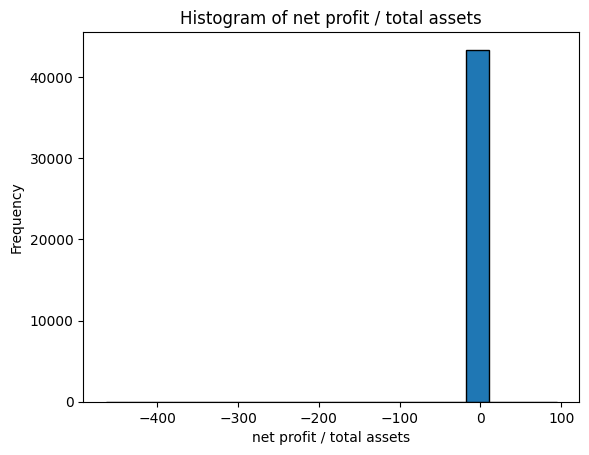

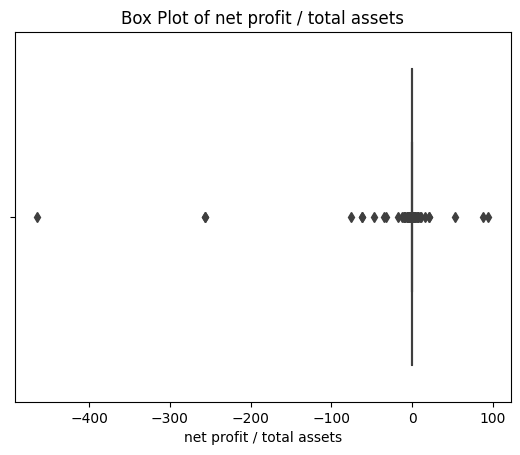



count    43405.000000
mean         0.035160
std          2.993833
min       -463.890000
25%          0.003434
50%          0.049636
75%          0.129560
max         94.280000
Name: net profit / total assets, dtype: float64


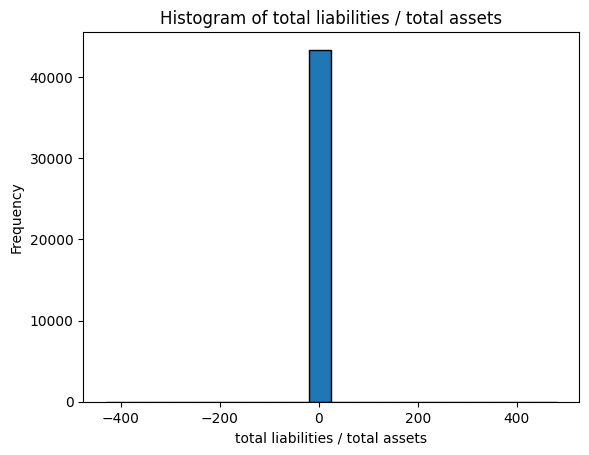

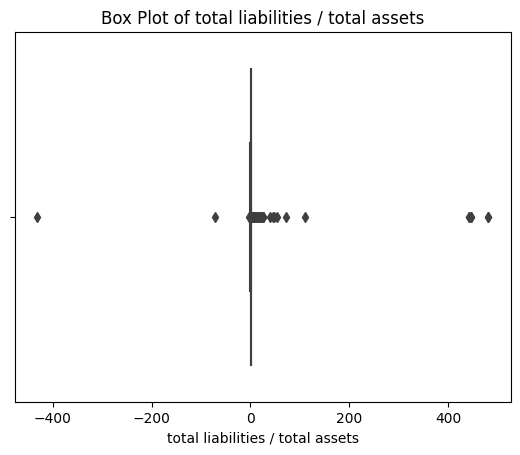



count    43405.000000
mean         0.590212
std          5.842209
min       -430.870000
25%          0.269010
50%          0.471940
75%          0.688270
max        480.960000
Name: total liabilities / total assets, dtype: float64


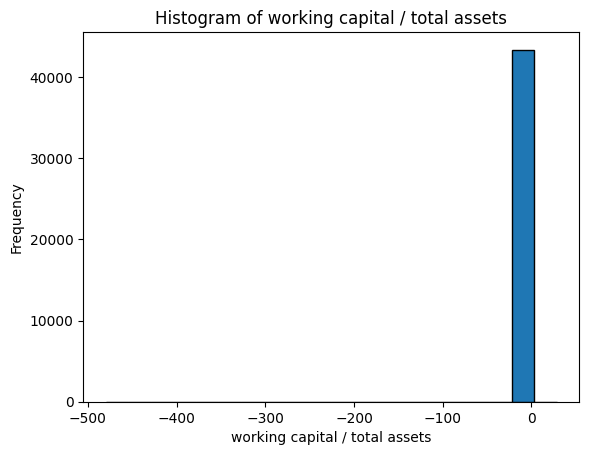

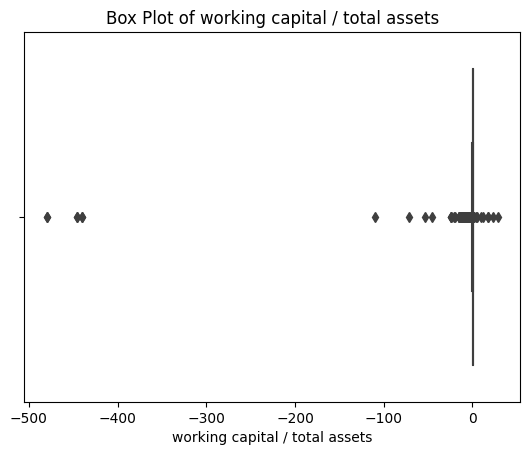



count    43405.000000
mean         0.114431
std          5.438928
min       -479.960000
25%          0.021540
50%          0.196580
75%          0.403260
max         28.336000
Name: working capital / total assets, dtype: float64


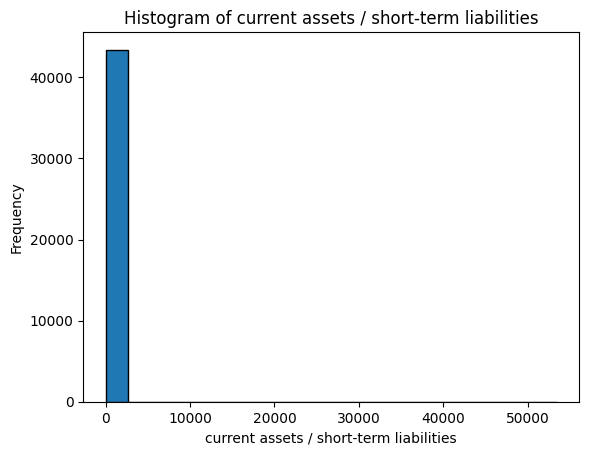

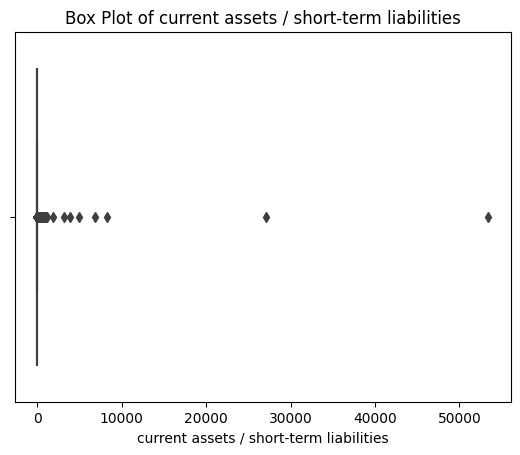



count    43405.000000
mean         6.314702
std        294.978029
min         -0.403110
25%          1.050800
50%          1.574000
75%          2.806000
max      53433.000000
Name: current assets / short-term liabilities, dtype: float64


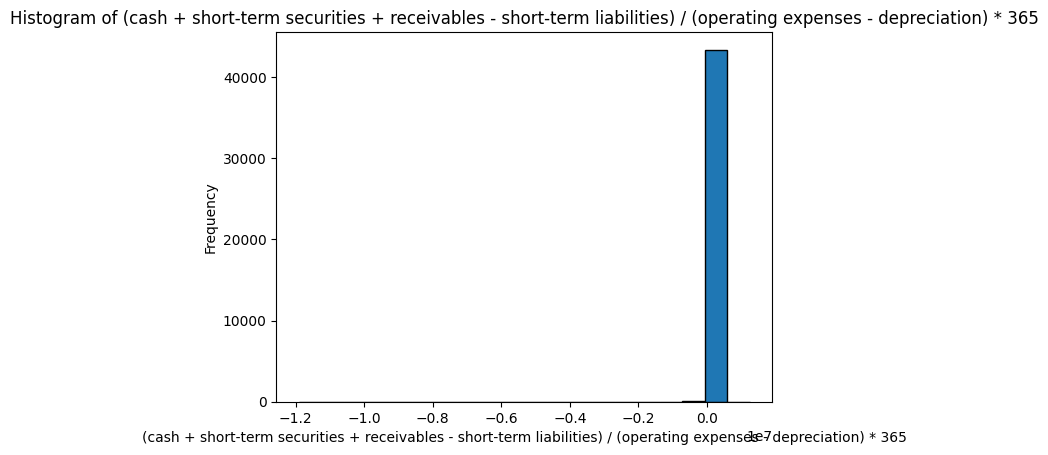

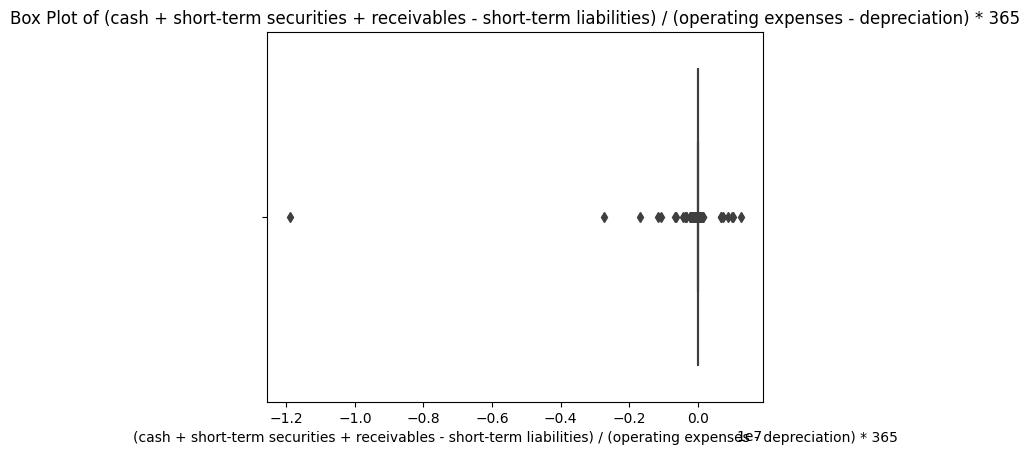



count    4.340500e+04
mean    -3.853466e+02
std      6.118020e+04
min     -1.190300e+07
25%     -4.949000e+01
50%     -1.184000e+00
75%      5.046100e+01
max      1.250100e+06
Name: (cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365, dtype: float64


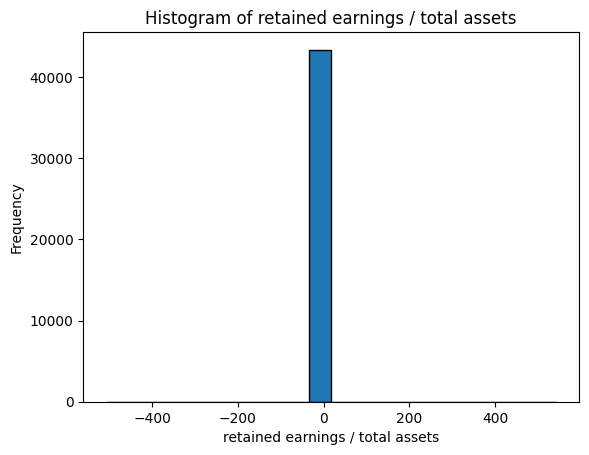

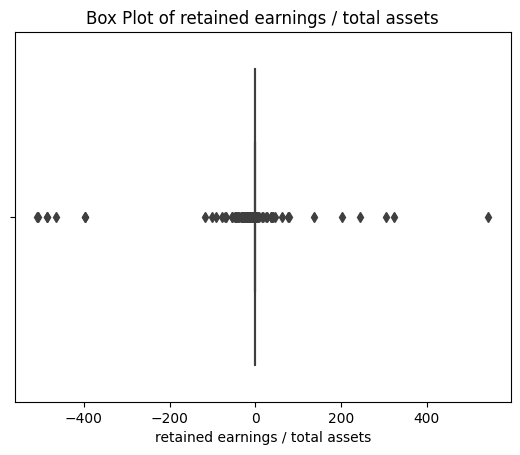



count    43405.000000
mean        -0.056107
std          7.200663
min       -508.410000
25%          0.000000
50%          0.000000
75%          0.089441
max        543.250000
Name: retained earnings / total assets, dtype: float64


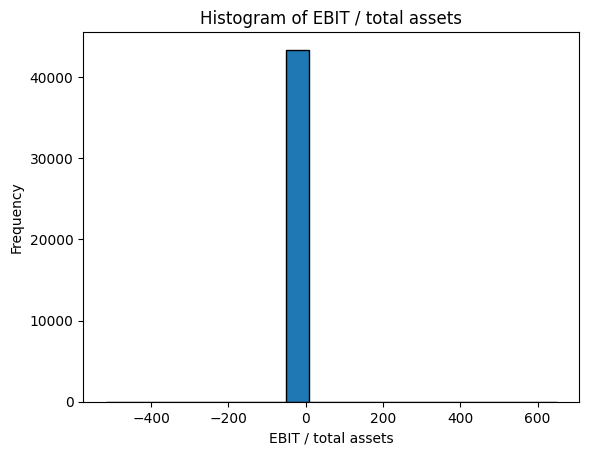

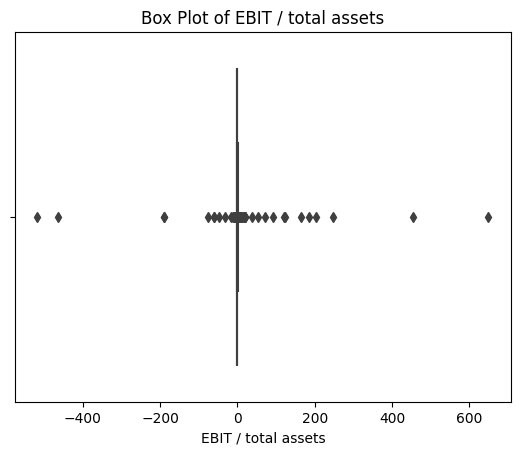



count    43405.000000
mean         0.093478
std          5.712548
min       -517.480000
25%          0.005783
50%          0.059653
75%          0.150810
max        649.230000
Name: EBIT / total assets, dtype: float64


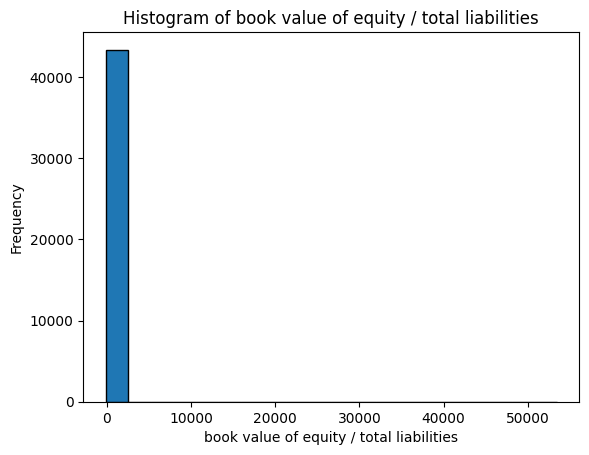

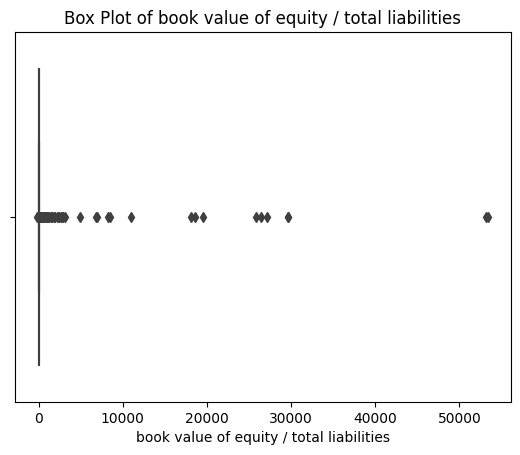



count    43405.000000
mean        12.640779
std        505.346176
min       -141.410000
25%          0.431070
50%          1.074100
75%          2.639100
max      53432.000000
Name: book value of equity / total liabilities, dtype: float64


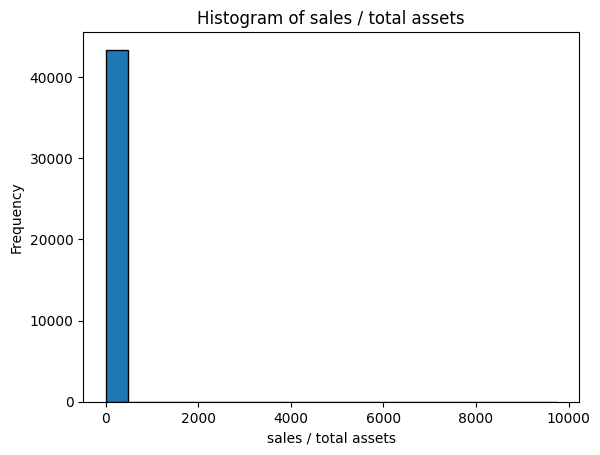

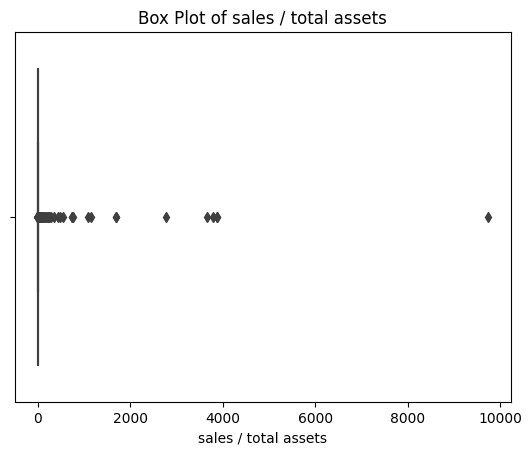



count    43405.000000
mean         2.652166
std         62.926207
min         -3.496000
25%          1.018500
50%          1.195500
75%          2.063000
max       9742.300000
Name: sales / total assets, dtype: float64


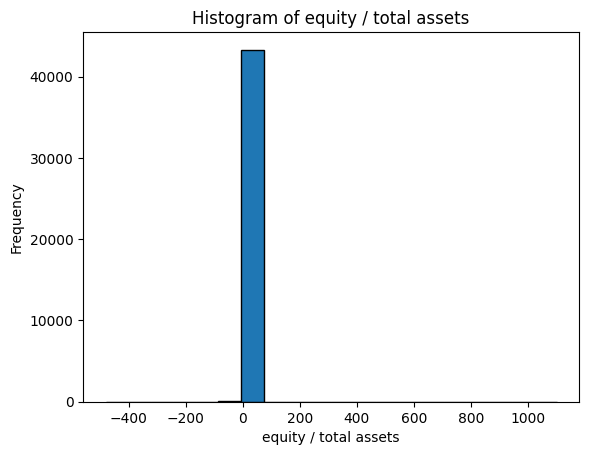

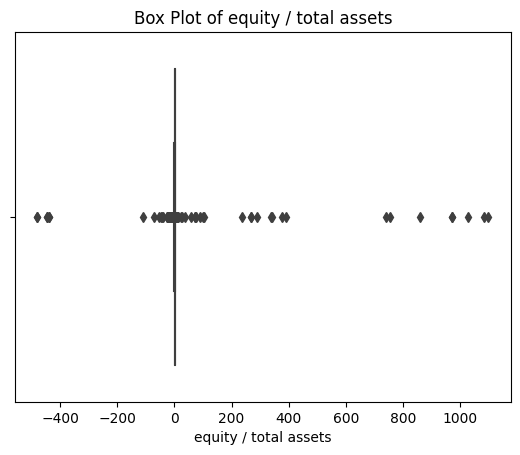



count    43405.000000
mean         0.626868
std         14.669245
min       -479.910000
25%          0.295530
50%          0.505990
75%          0.709090
max       1099.500000
Name: equity / total assets, dtype: float64


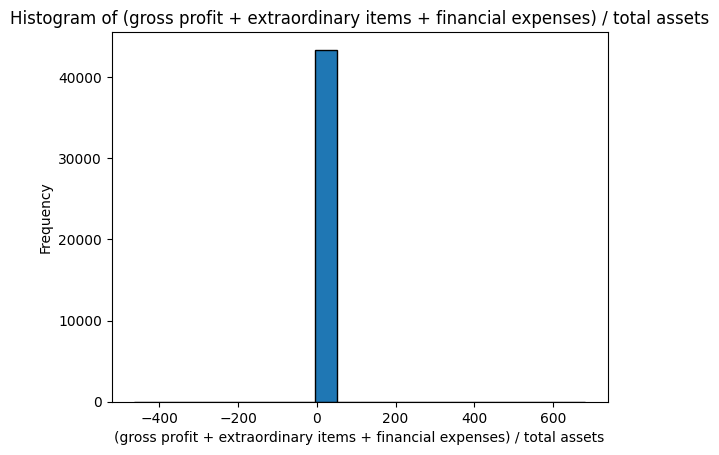

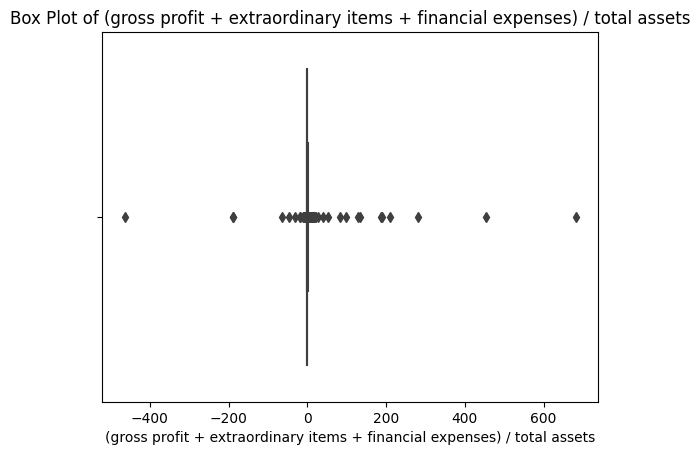



count    43405.000000
mean         0.131075
std          5.304091
min       -463.890000
25%          0.015466
50%          0.075444
75%          0.166590
max        681.540000
Name: (gross profit + extraordinary items + financial expenses) / total assets, dtype: float64


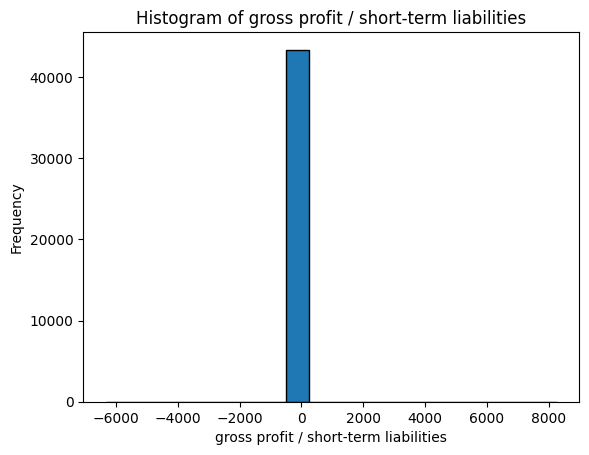

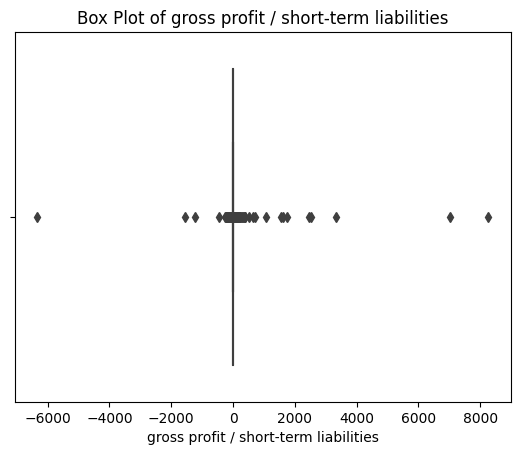



count    43405.000000
mean         1.132430
std         67.485881
min      -6331.800000
25%          0.015294
50%          0.173830
75%          0.593420
max       8259.400000
Name: gross profit / short-term liabilities, dtype: float64


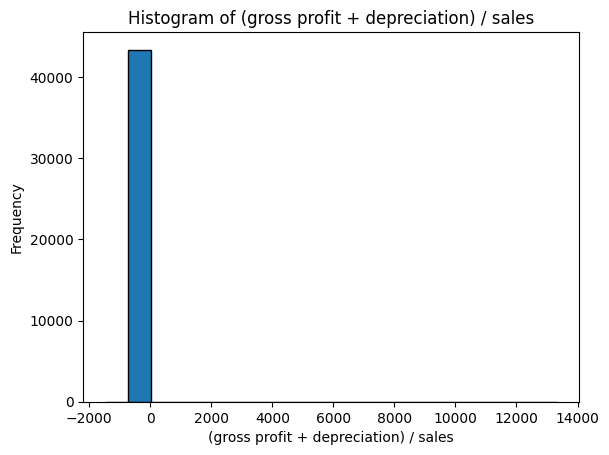

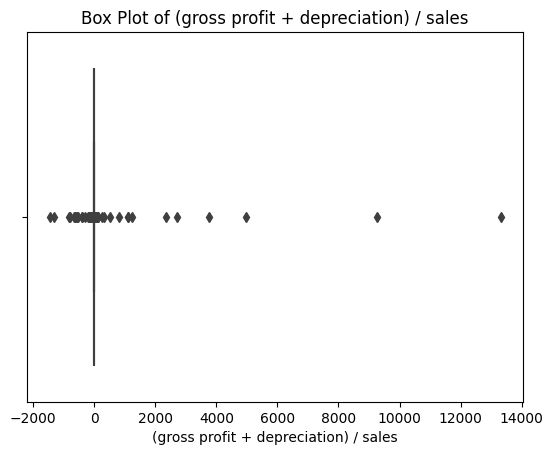



count    43405.000000
mean         0.809544
std         86.816761
min      -1460.600000
25%          0.023998
50%          0.068794
75%          0.135830
max      13315.000000
Name: (gross profit + depreciation) / sales, dtype: float64


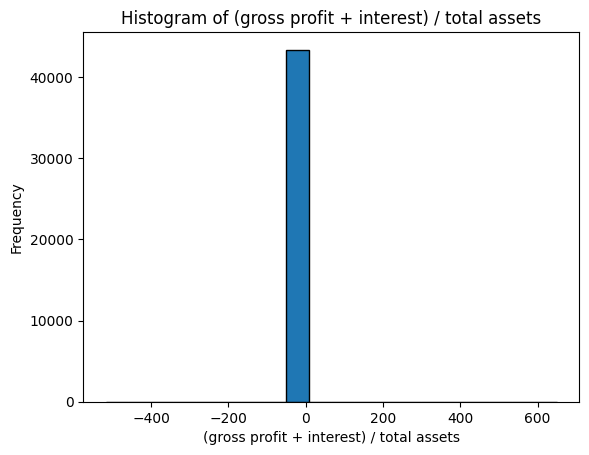

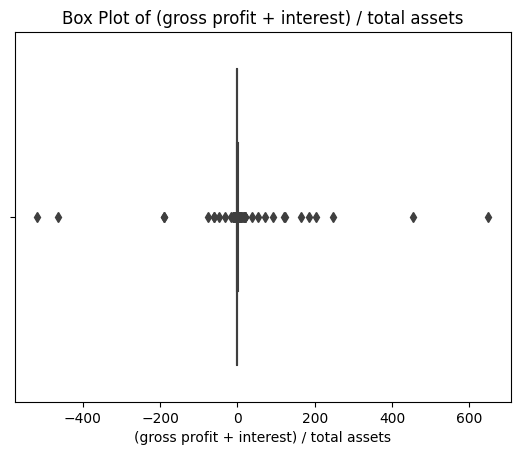



count    43405.000000
mean         0.093489
std          5.712548
min       -517.480000
25%          0.005795
50%          0.059665
75%          0.150830
max        649.230000
Name: (gross profit + interest) / total assets, dtype: float64


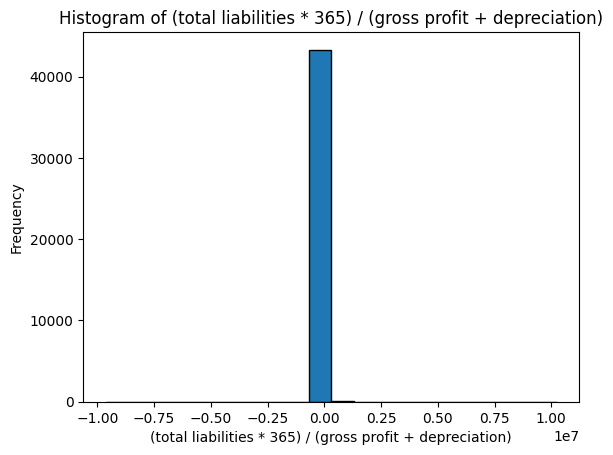

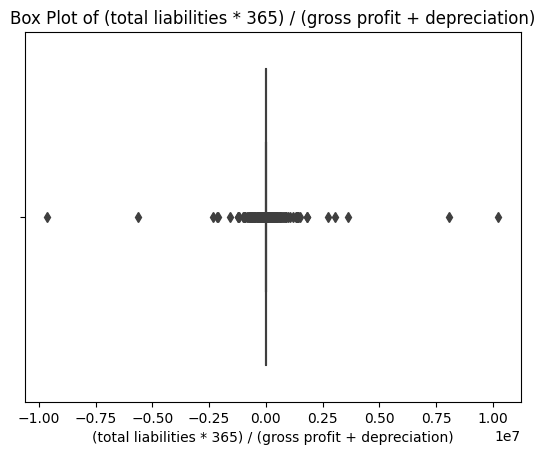



count    4.340500e+04
mean     1.991890e+03
std      9.639193e+04
min     -9.632400e+06
25%      2.231800e+02
50%      8.471100e+02
75%      2.224800e+03
max      1.023600e+07
Name: (total liabilities * 365) / (gross profit + depreciation), dtype: float64


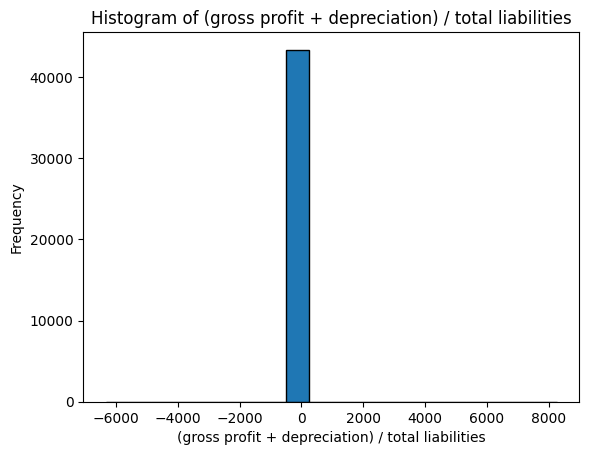

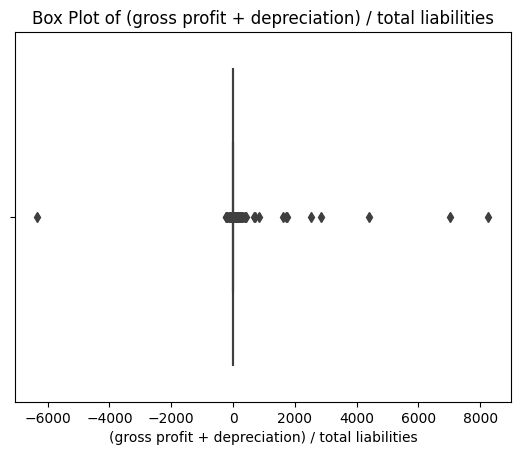



count    43405.000000
mean         1.411167
std         68.444971
min      -6331.800000
25%          0.073787
50%          0.246780
75%          0.669140
max       8259.400000
Name: (gross profit + depreciation) / total liabilities, dtype: float64


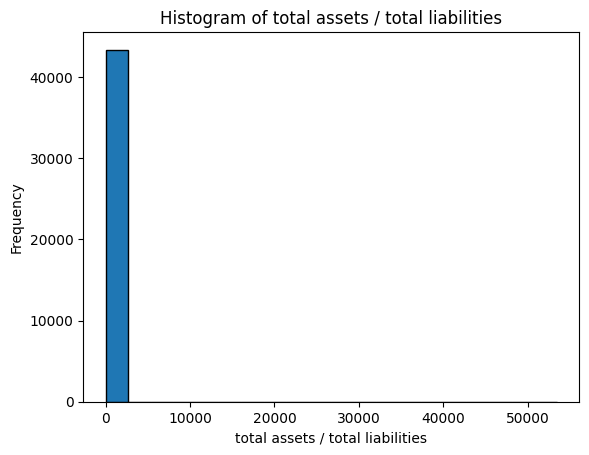

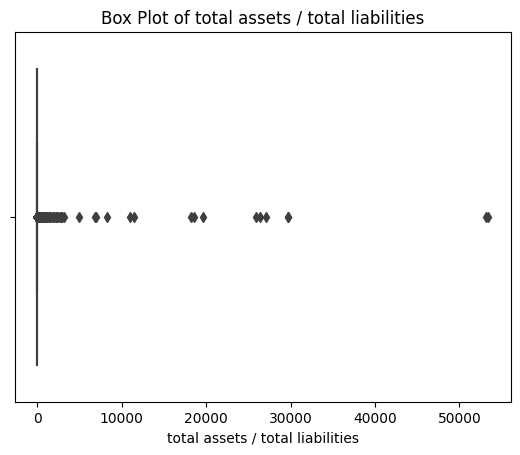



count    43405.000000
mean        13.802535
std        506.772450
min         -0.412920
25%          1.452400
50%          2.119000
75%          3.717800
max      53433.000000
Name: total assets / total liabilities, dtype: float64


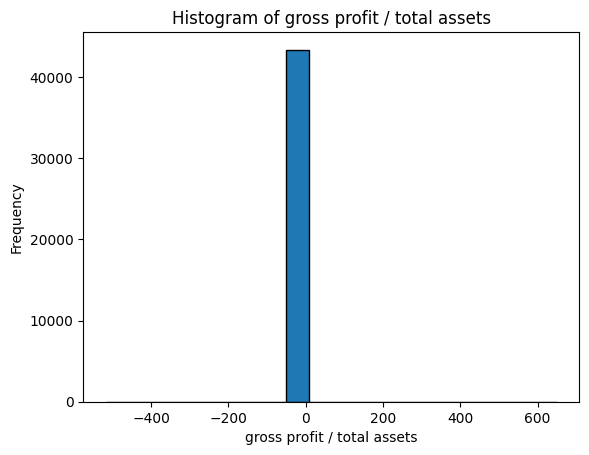

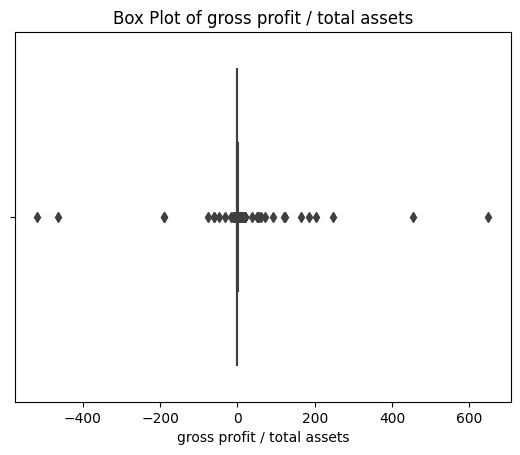



count    43405.000000
mean         0.098565
std          5.737116
min       -517.480000
25%          0.005795
50%          0.059665
75%          0.150880
max        649.230000
Name: gross profit / total assets, dtype: float64


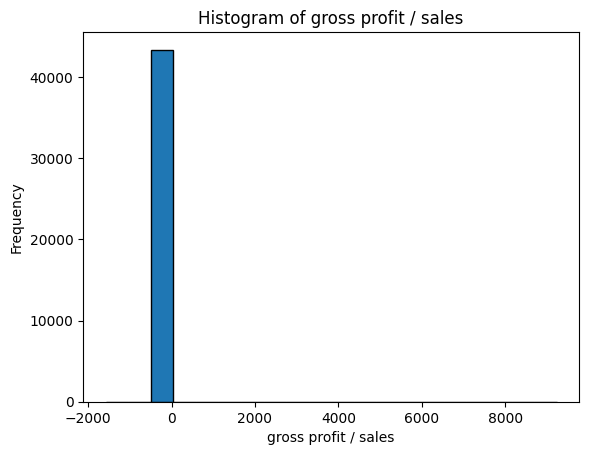

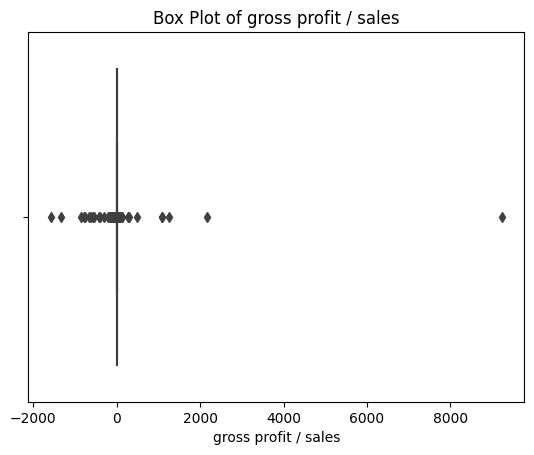



count    43405.000000
mean         0.156277
std         48.620304
min      -1578.700000
25%          0.003947
50%          0.036180
75%          0.091700
max       9230.500000
Name: gross profit / sales, dtype: float64


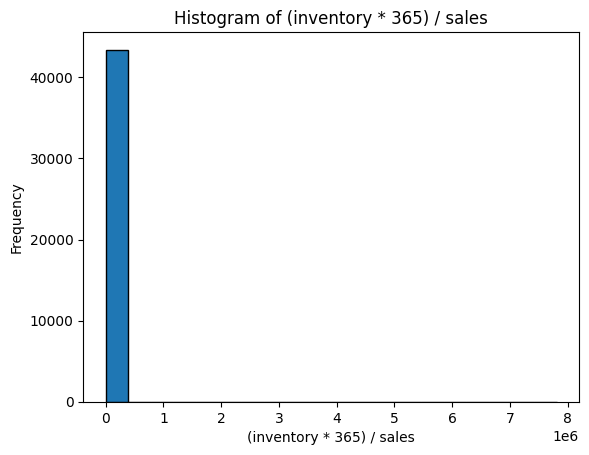

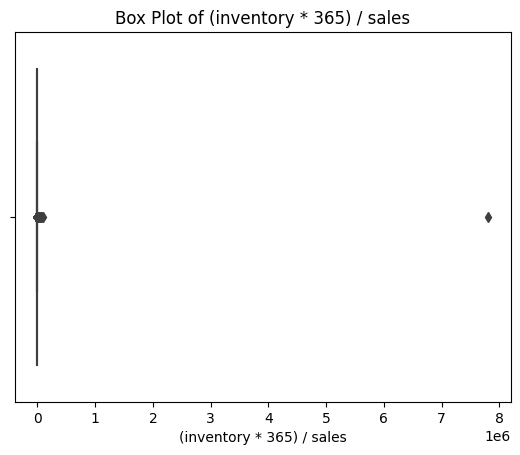



count    4.340500e+04
mean     2.430209e+02
std      3.749021e+04
min     -2.934000e+01
25%      1.544900e+01
50%      3.528400e+01
75%      6.407300e+01
max      7.809200e+06
Name: (inventory * 365) / sales, dtype: float64


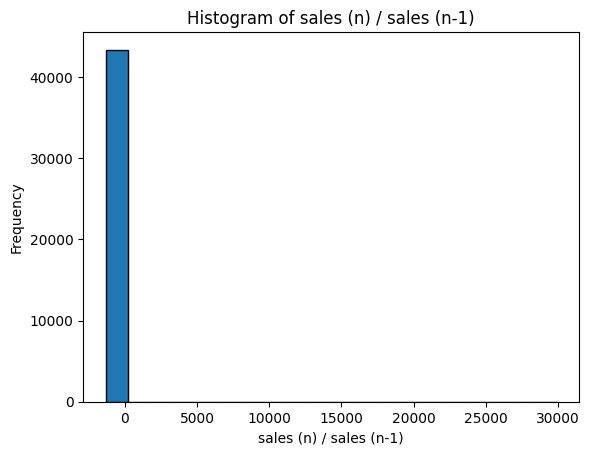

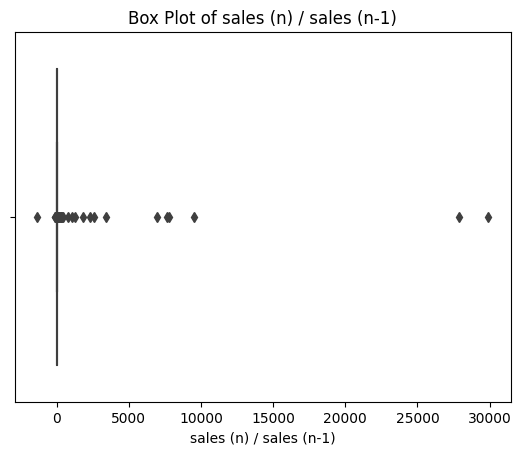



count    43405.000000
mean         3.884997
std        212.690090
min      -1325.000000
25%          0.934070
50%          1.086800
75%          1.346100
max      29907.000000
Name: sales (n) / sales (n-1), dtype: float64


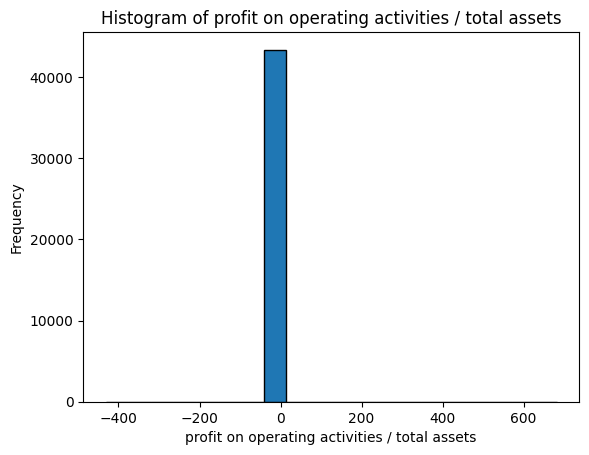

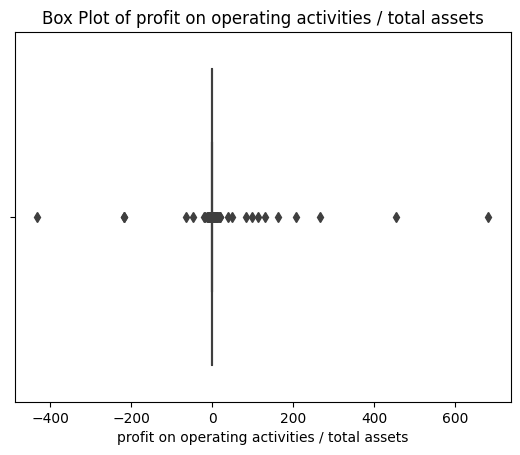



count    43405.000000
mean         0.113923
std          5.155303
min       -431.590000
25%          0.000000
50%          0.062273
75%          0.149940
max        681.540000
Name: profit on operating activities / total assets, dtype: float64


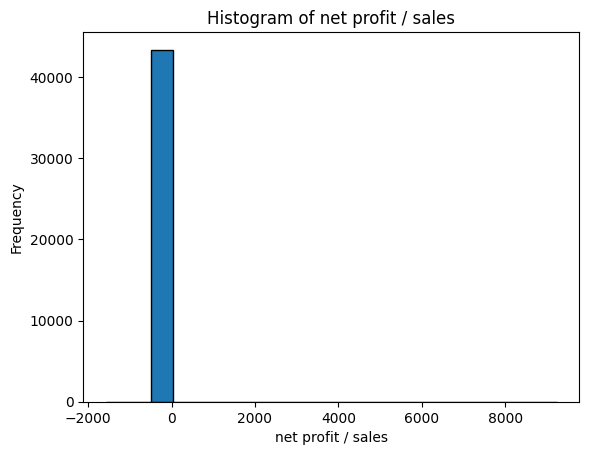

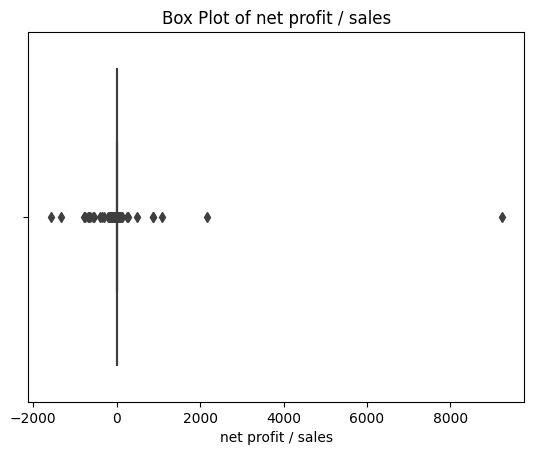



count    43405.000000
mean         0.138582
std         48.264208
min      -1578.700000
25%          0.002329
50%          0.030139
75%          0.078777
max       9230.500000
Name: net profit / sales, dtype: float64


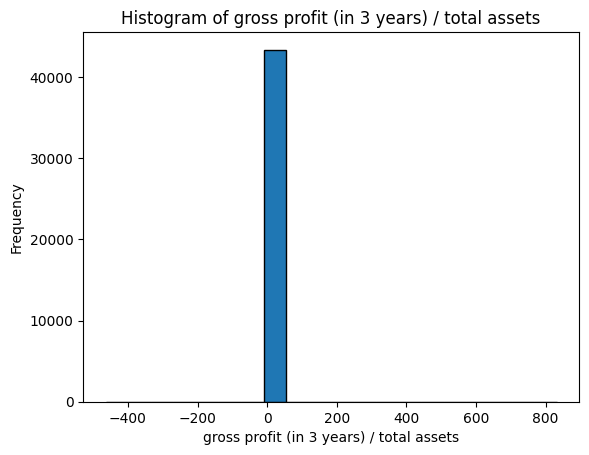

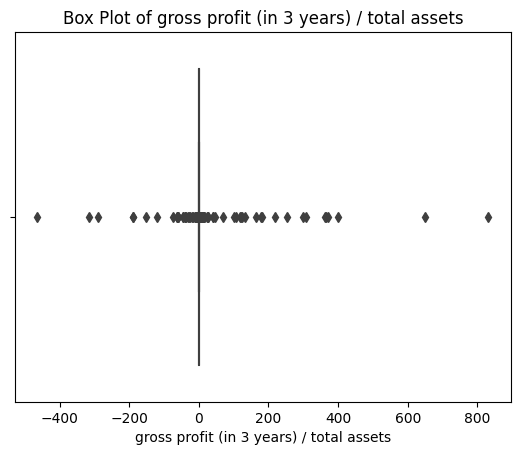



count    43405.000000
mean         0.270012
std          7.902852
min       -463.890000
25%          0.024308
50%          0.161710
75%          0.350270
max        831.660000
Name: gross profit (in 3 years) / total assets, dtype: float64


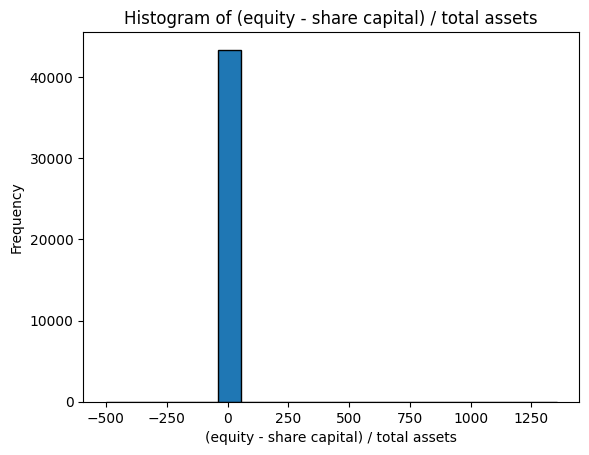

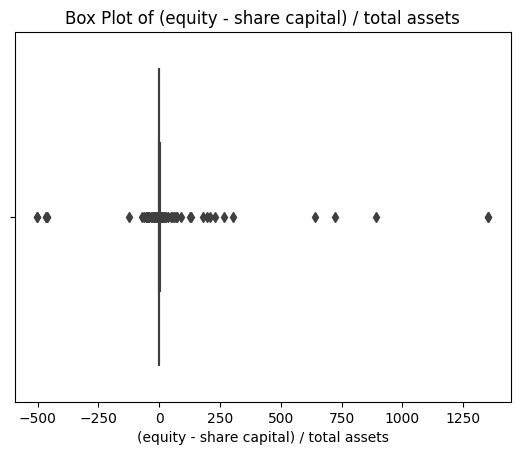



count    43405.000000
mean         0.392844
std         12.890251
min       -500.930000
25%          0.150140
50%          0.384600
75%          0.610700
max       1353.300000
Name: (equity - share capital) / total assets, dtype: float64


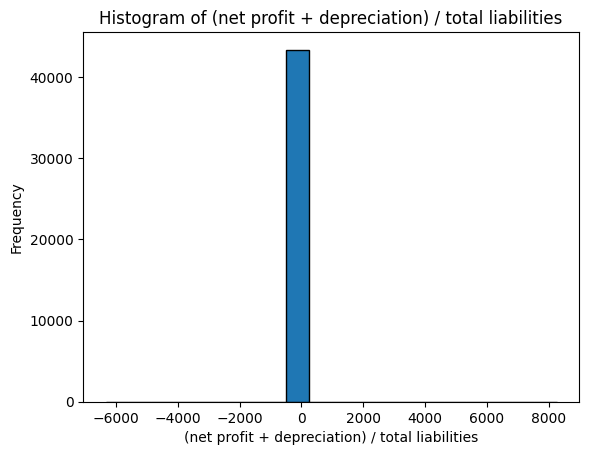

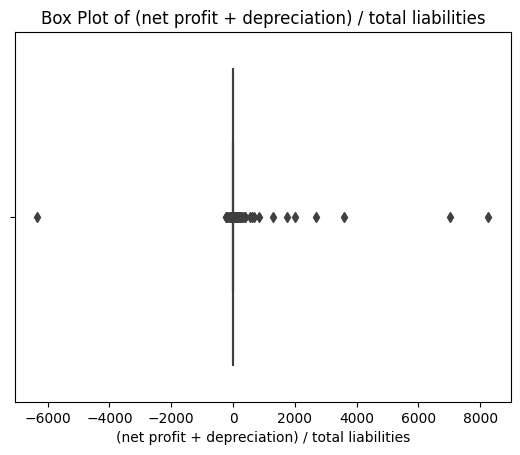



count    43405.000000
mean         1.263864
std         66.151611
min      -6331.800000
25%          0.067034
50%          0.222550
75%          0.602580
max       8262.300000
Name: (net profit + depreciation) / total liabilities, dtype: float64


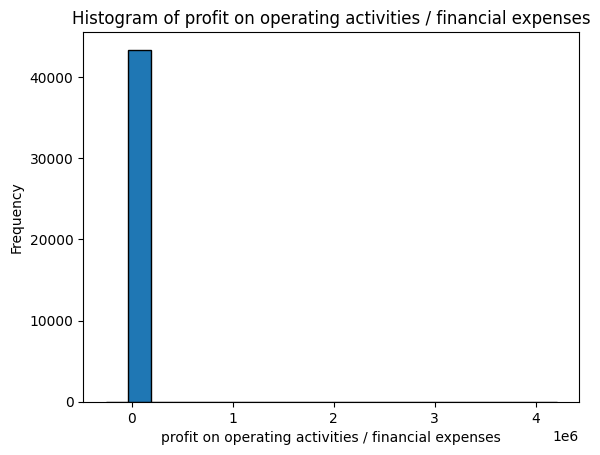

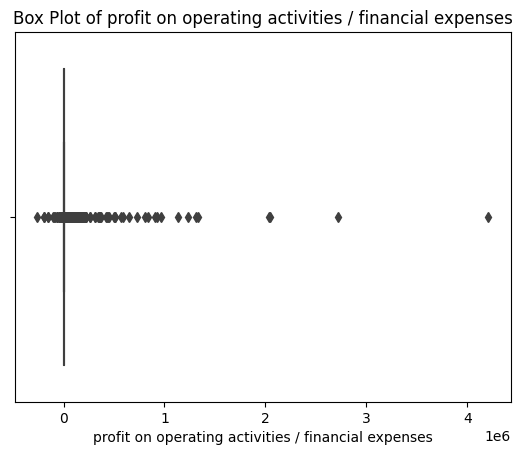



count    4.340500e+04
mean     1.107896e+03
std      3.387922e+04
min     -2.590100e+05
25%      1.062800e-01
50%      1.278200e+00
75%      8.273500e+00
max      4.208800e+06
Name: profit on operating activities / financial expenses, dtype: float64


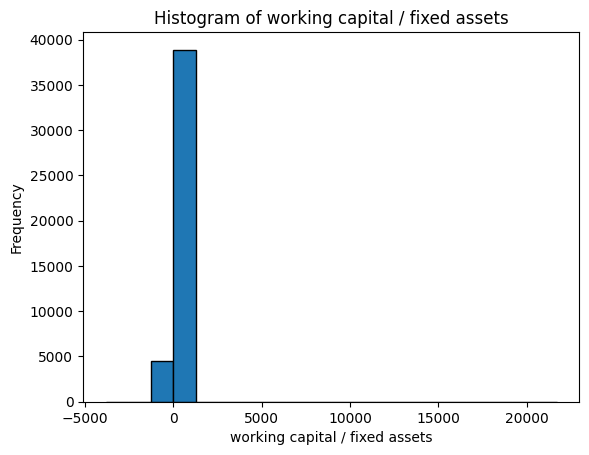

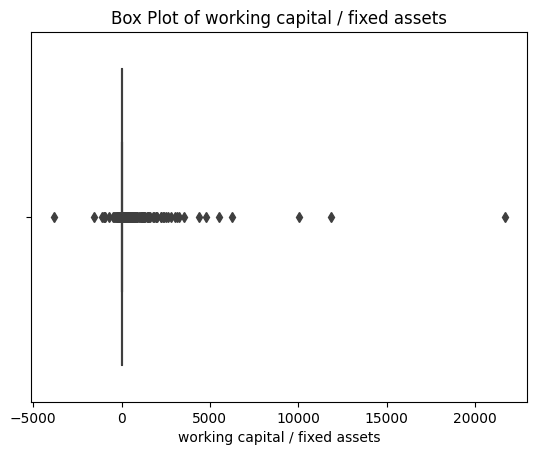



count    43405.000000
mean         6.003208
std        152.026308
min      -3829.900000
25%          0.044774
50%          0.486640
75%          1.618100
max      21701.000000
Name: working capital / fixed assets, dtype: float64


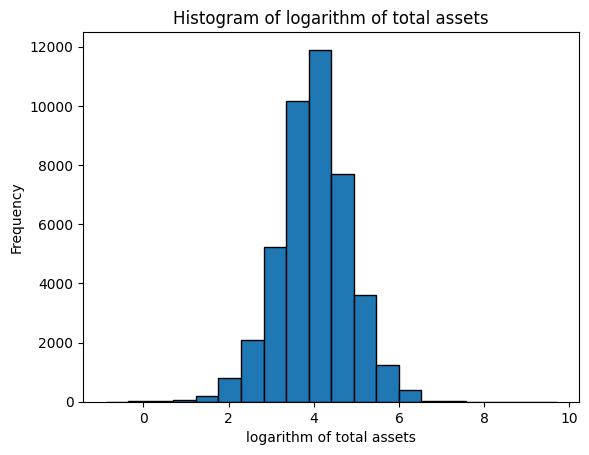

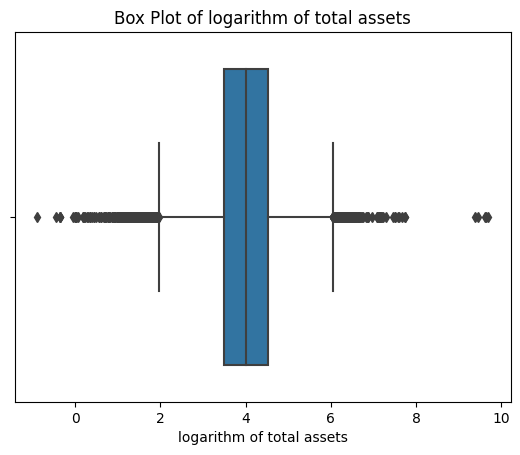



count    43405.000000
mean         4.005020
std          0.826781
min         -0.886060
25%          3.495300
50%          4.013900
75%          4.520100
max          9.698300
Name: logarithm of total assets, dtype: float64


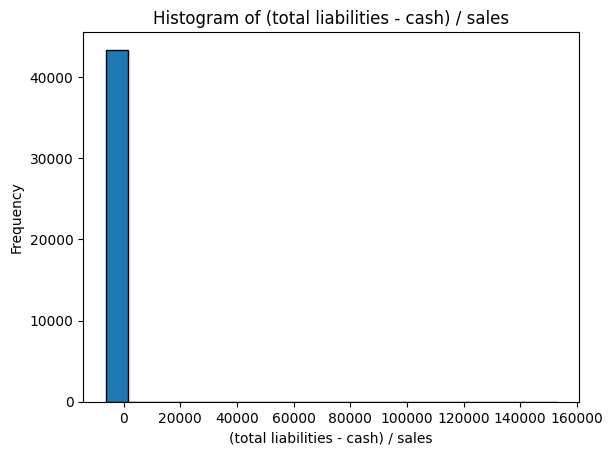

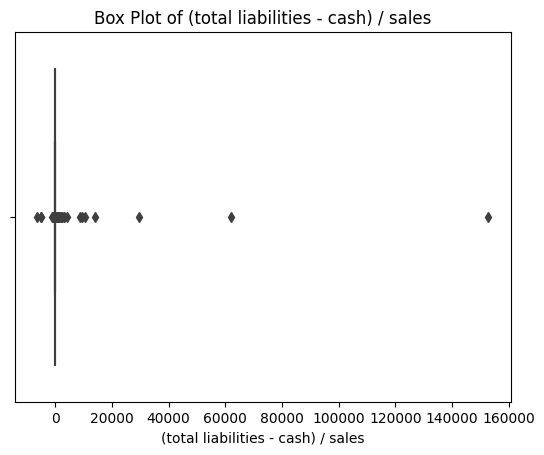



count     43405.000000
mean          7.370821
std         813.297607
min       -6351.700000
25%           0.083115
50%           0.218200
75%           0.411340
max      152860.000000
Name: (total liabilities - cash) / sales, dtype: float64


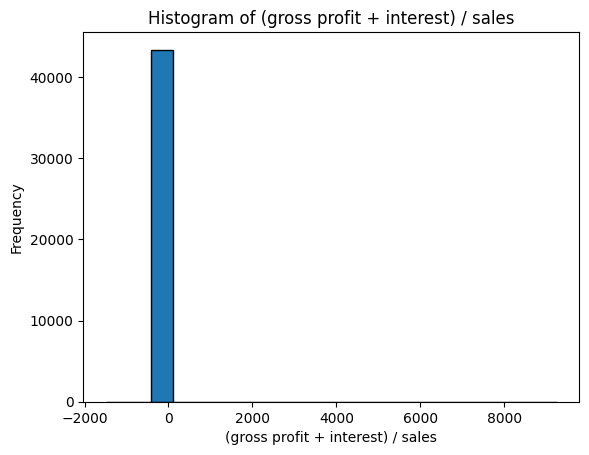

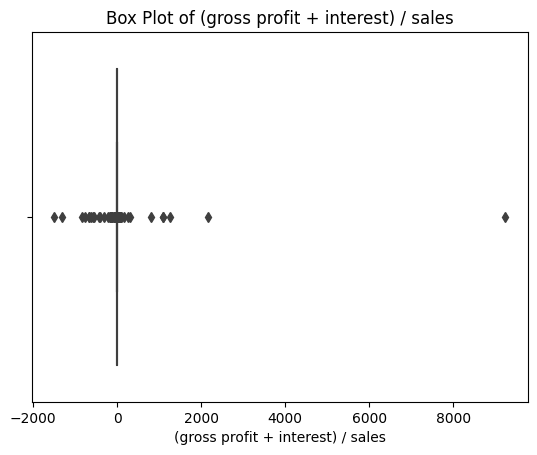



count    43405.000000
mean         0.176847
std         48.677039
min      -1495.600000
25%          0.007062
50%          0.043350
75%          0.102220
max       9244.300000
Name: (gross profit + interest) / sales, dtype: float64


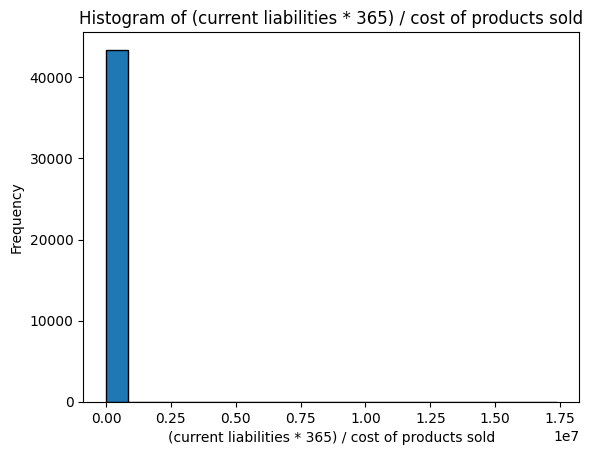

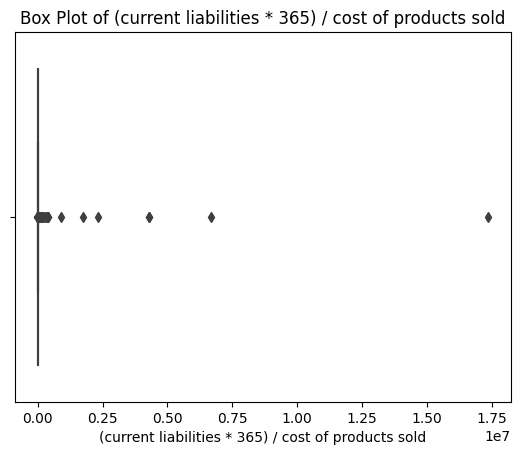



count    4.340500e+04
mean     1.162621e+03
std      9.518745e+04
min     -9.295600e+03
25%      4.664400e+01
50%      7.904200e+01
75%      1.300600e+02
max      1.736400e+07
Name: (current liabilities * 365) / cost of products sold, dtype: float64


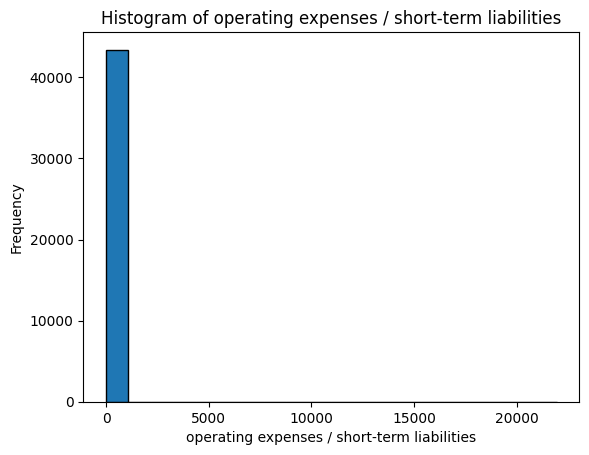

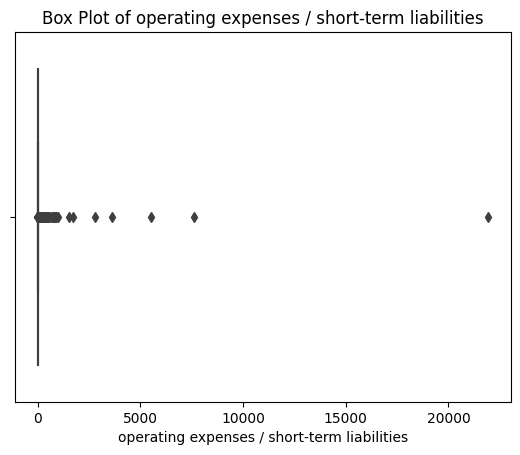



count    43405.000000
mean         8.636016
std        118.807364
min        -19.197000
25%          2.824800
50%          4.641700
75%          7.852400
max      21944.000000
Name: operating expenses / short-term liabilities, dtype: float64


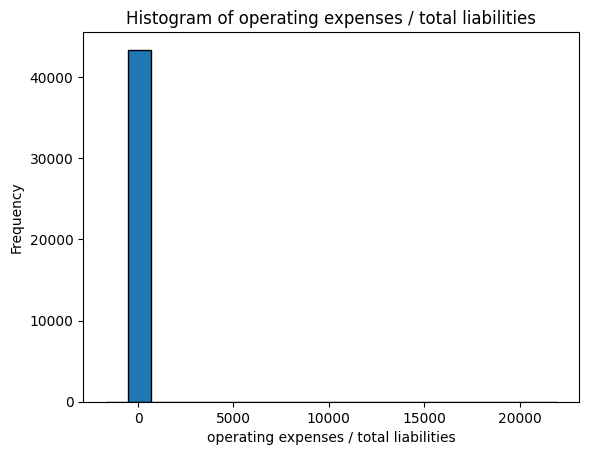

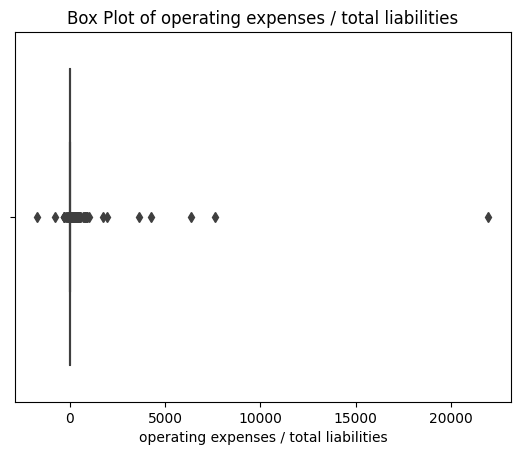



count    43405.000000
mean         5.411439
std        120.844041
min      -1696.000000
25%          0.307820
50%          1.975100
75%          4.579500
max      21944.000000
Name: operating expenses / total liabilities, dtype: float64


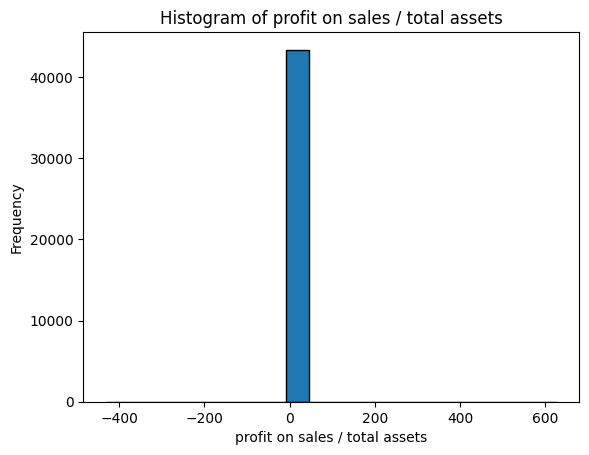

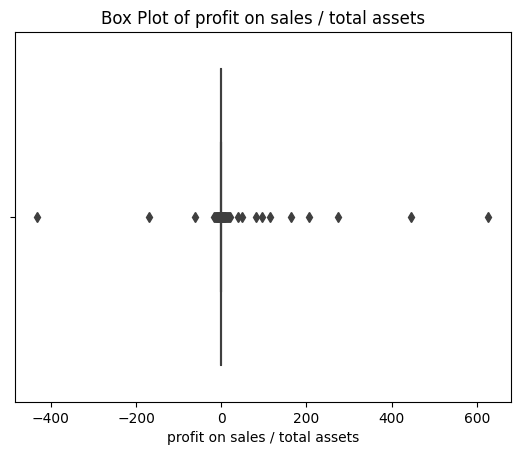



count    43405.000000
mean         0.111908
std          4.782957
min       -431.590000
25%          0.006052
50%          0.060684
75%          0.150070
max        626.920000
Name: profit on sales / total assets, dtype: float64


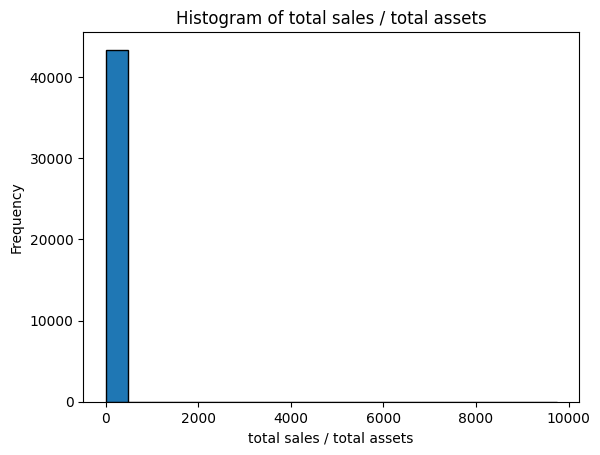

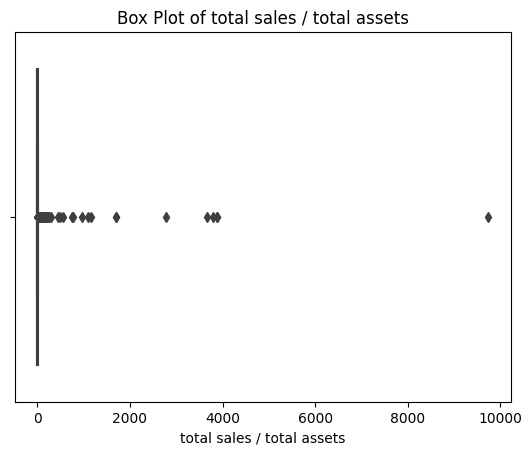



count    43405.000000
mean         2.911241
std         62.978542
min         -0.000857
25%          1.101100
50%          1.643400
75%          2.421300
max       9742.300000
Name: total sales / total assets, dtype: float64


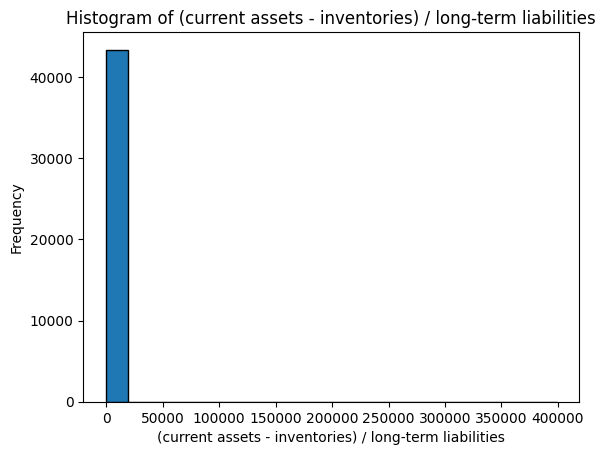

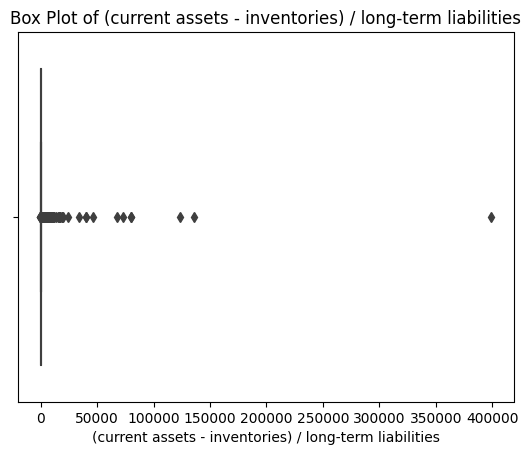



count     43405.000000
mean        105.085363
std        2294.068984
min        -525.520000
25%           2.485300
50%          47.120000
75%         105.085363
max      398920.000000
Name: (current assets - inventories) / long-term liabilities, dtype: float64


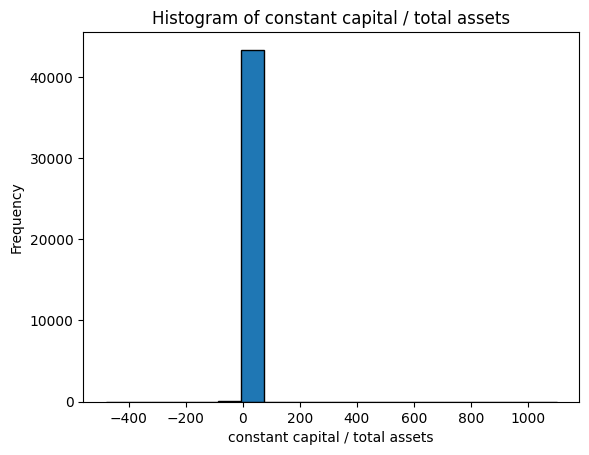

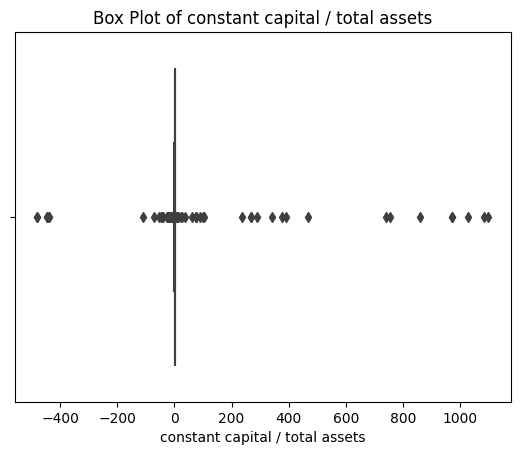



count    43405.000000
mean         0.724357
std         14.747911
min       -479.910000
25%          0.419840
50%          0.612280
75%          0.771810
max       1099.500000
Name: constant capital / total assets, dtype: float64


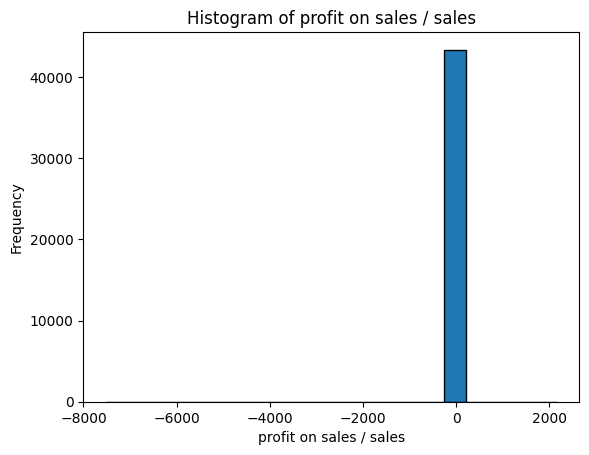

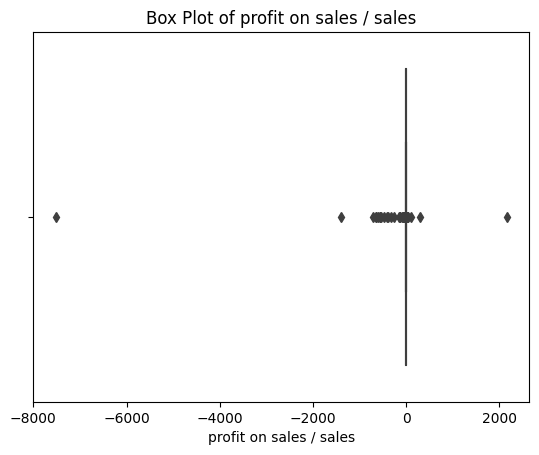



count    43405.000000
mean        -0.289102
std         39.198886
min      -7522.000000
25%          0.003907
50%          0.036652
75%          0.091532
max       2156.500000
Name: profit on sales / sales, dtype: float64


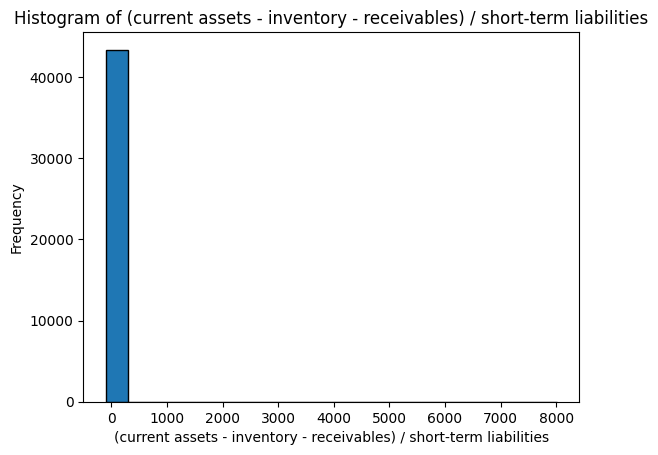

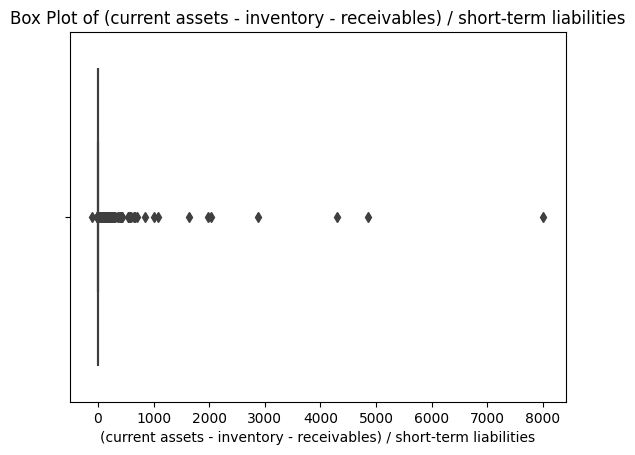



count    43405.000000
mean         2.147411
std         55.943322
min       -101.270000
25%          0.052877
50%          0.178130
75%          0.662320
max       8007.100000
Name: (current assets - inventory - receivables) / short-term liabilities, dtype: float64


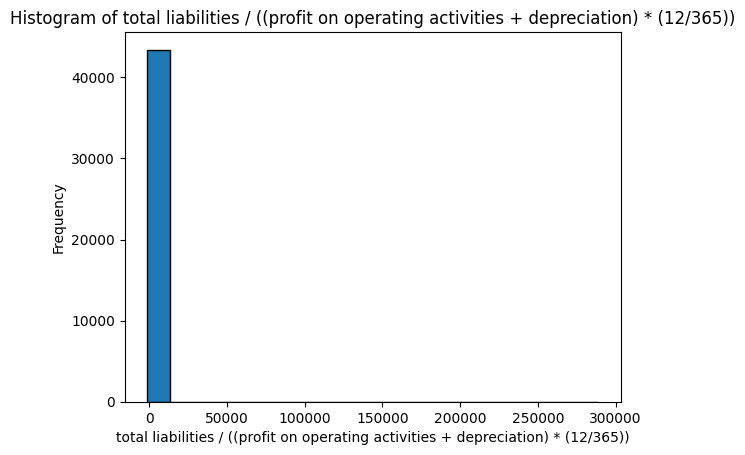

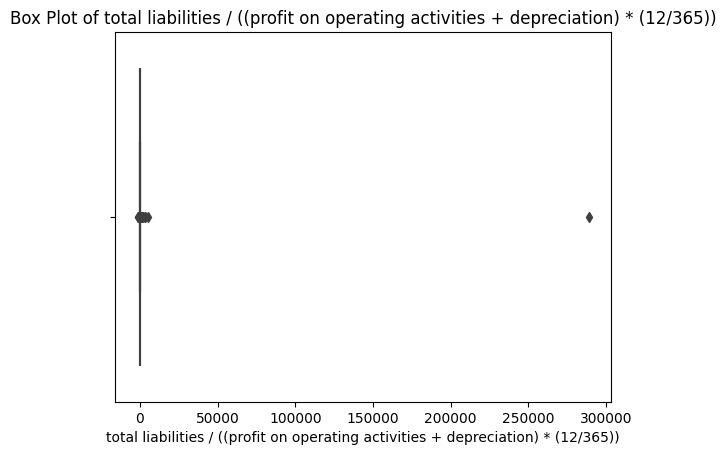



count     43405.000000
mean          7.717806
std        1386.634240
min       -1234.400000
25%           0.027543
50%           0.088181
75%           0.217020
max      288770.000000
Name: total liabilities / ((profit on operating activities + depreciation) * (12/365)), dtype: float64


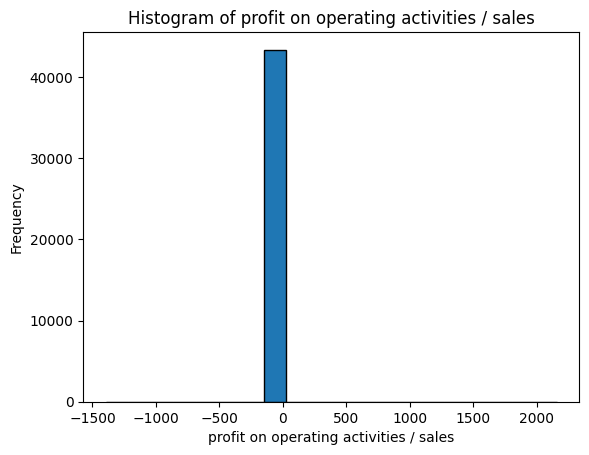

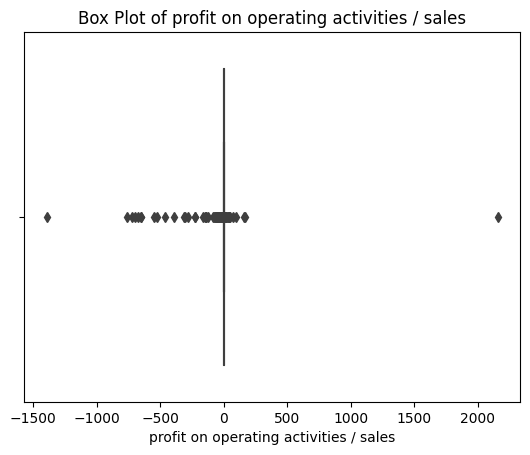



count    43405.000000
mean        -0.142514
std         15.967576
min      -1395.800000
25%          0.000000
50%          0.037770
75%          0.091865
max       2156.800000
Name: profit on operating activities / sales, dtype: float64


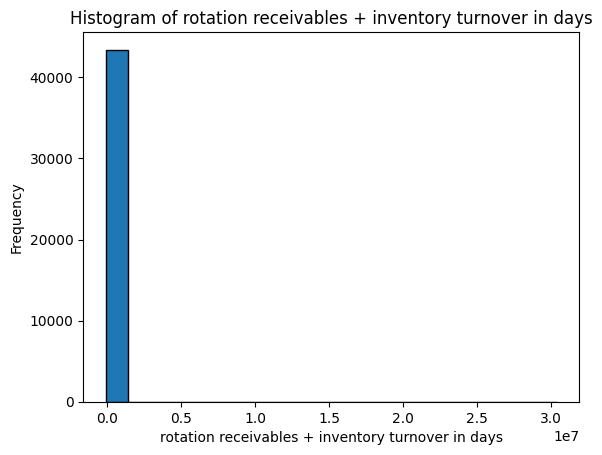

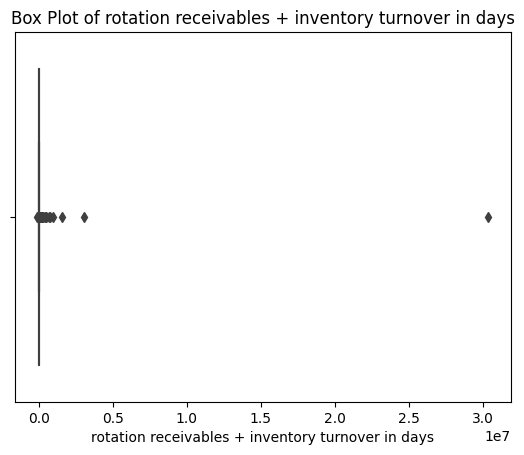



count    4.340500e+04
mean     1.074125e+03
std      1.470032e+05
min     -1.158700e+05
25%      6.670200e+01
50%      9.957900e+01
75%      1.412700e+02
max      3.039300e+07
Name: rotation receivables + inventory turnover in days, dtype: float64


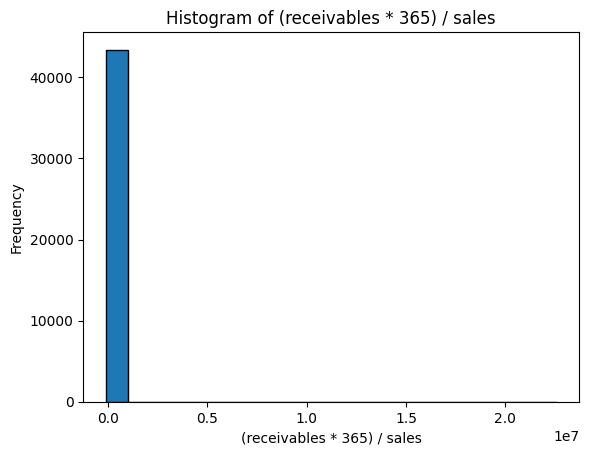

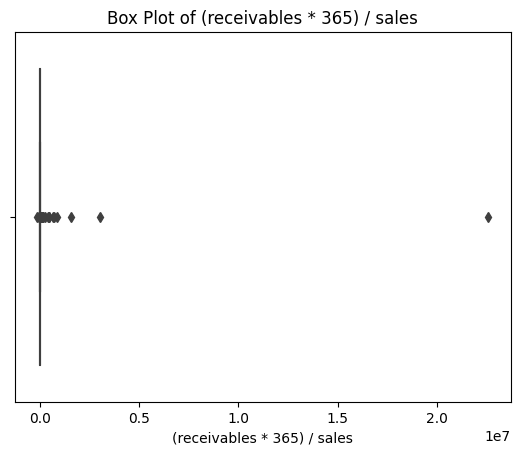



count    4.340500e+04
mean     8.311085e+02
std      1.098898e+05
min     -1.158700e+05
25%      3.493800e+01
50%      5.488100e+01
75%      8.082000e+01
max      2.258400e+07
Name: (receivables * 365) / sales, dtype: float64


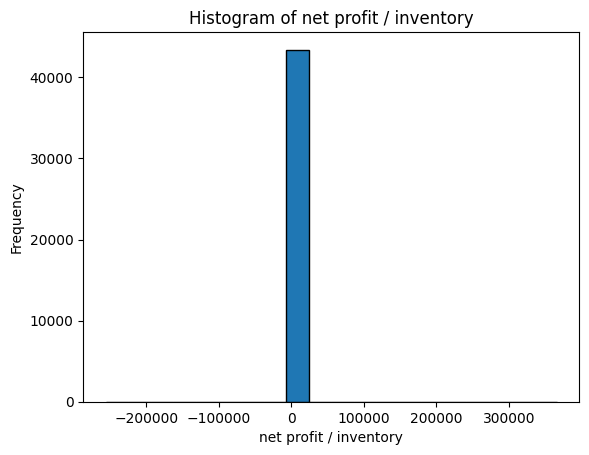

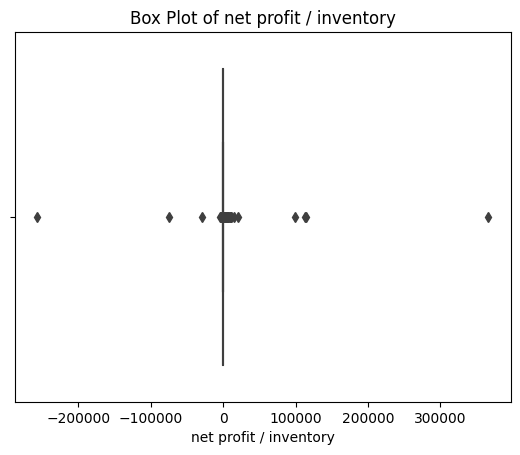



count     43405.000000
mean         14.825016
std        2367.417525
min     -256230.000000
25%           0.027707
50%           0.323390
75%           1.189800
max      366030.000000
Name: net profit / inventory, dtype: float64


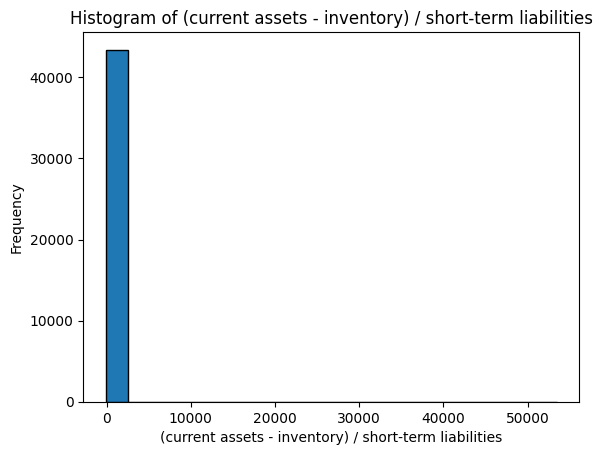

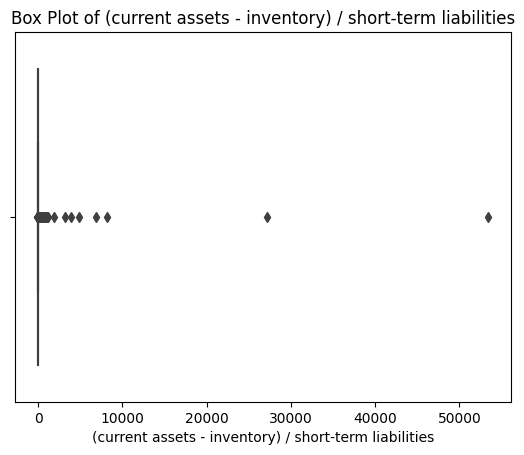



count    43405.000000
mean         5.428857
std        294.896517
min       -101.260000
25%          0.608610
50%          1.030000
75%          1.924900
max      53433.000000
Name: (current assets - inventory) / short-term liabilities, dtype: float64


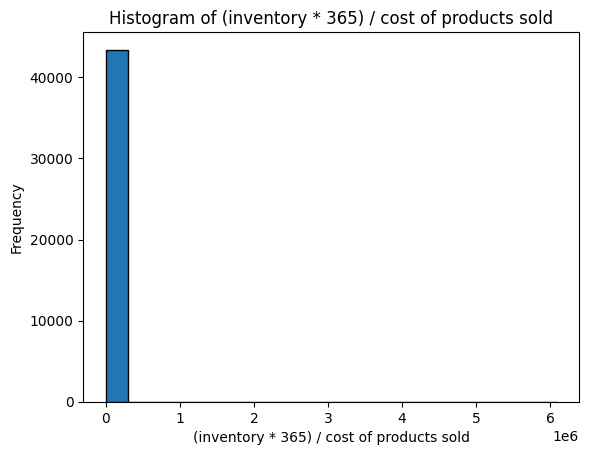

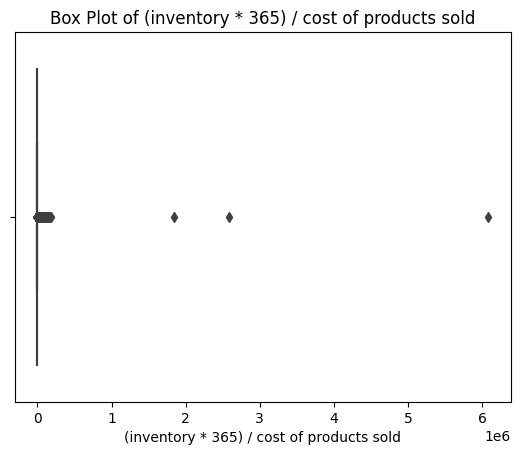



count    4.340500e+04
mean     3.578418e+02
std      3.303274e+04
min     -9.611000e+01
25%      1.637300e+01
50%      3.848200e+01
75%      7.124600e+01
max      6.084200e+06
Name: (inventory * 365) / cost of products sold, dtype: float64


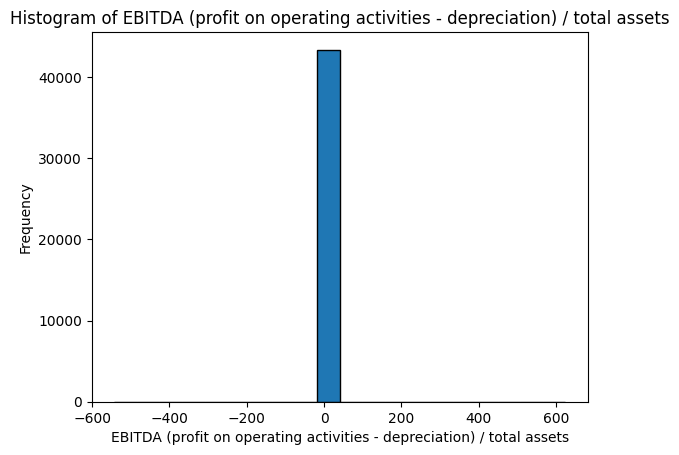

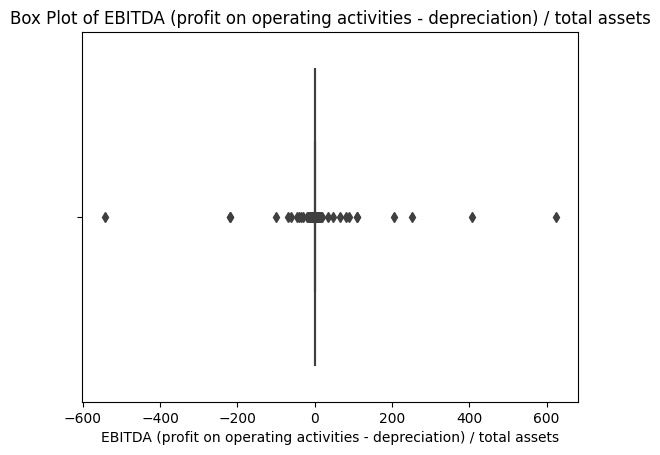



count    43405.000000
mean         0.028584
std          5.096793
min       -542.560000
25%         -0.038171
50%          0.018438
75%          0.107280
max        623.850000
Name: EBITDA (profit on operating activities - depreciation) / total assets, dtype: float64


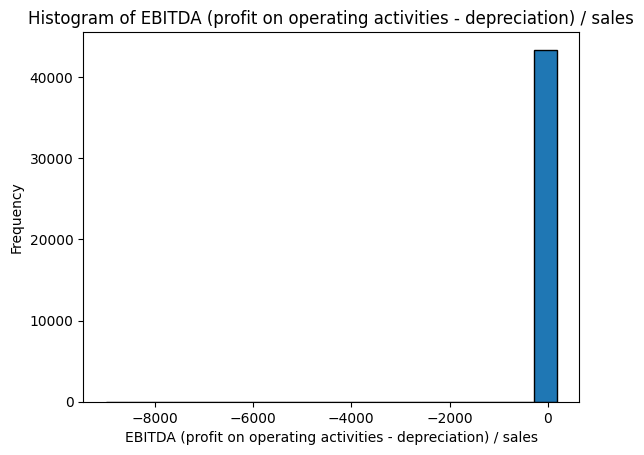

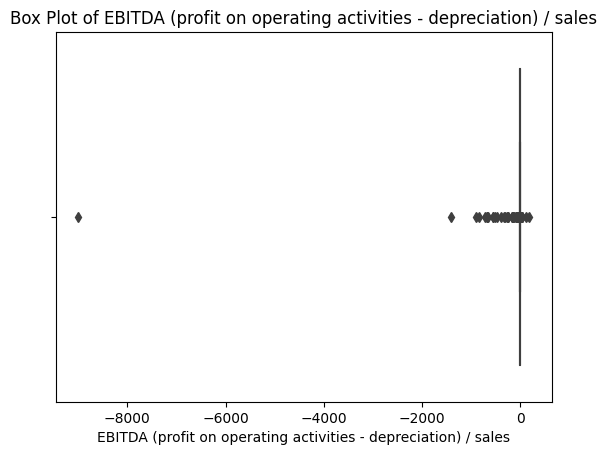



count    43405.000000
mean        -0.482584
std         45.086068
min      -9001.000000
25%         -0.027299
50%          0.010755
75%          0.062055
max        178.890000
Name: EBITDA (profit on operating activities - depreciation) / sales, dtype: float64


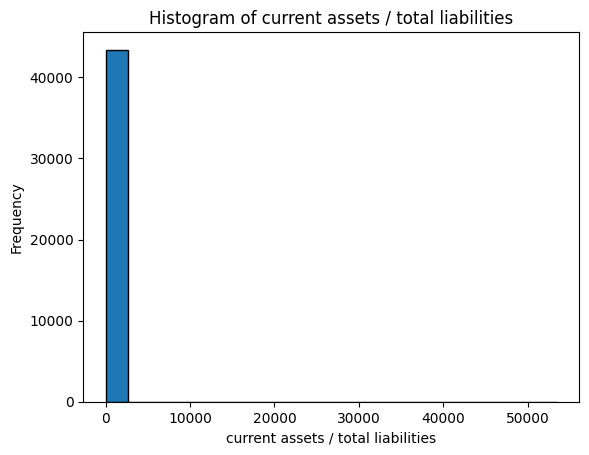

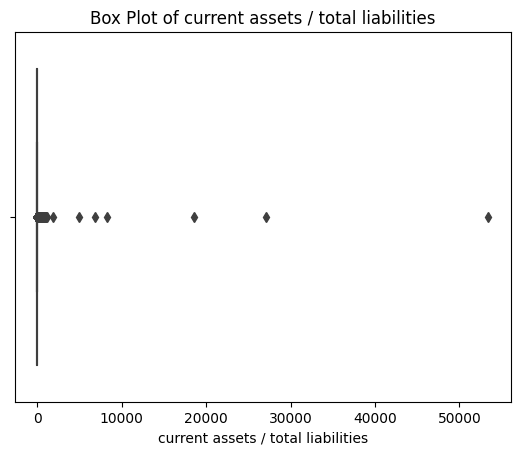



count    43405.000000
mean         5.835373
std        307.049658
min         -0.045239
25%          0.775870
50%          1.224700
75%          2.221800
max      53433.000000
Name: current assets / total liabilities, dtype: float64


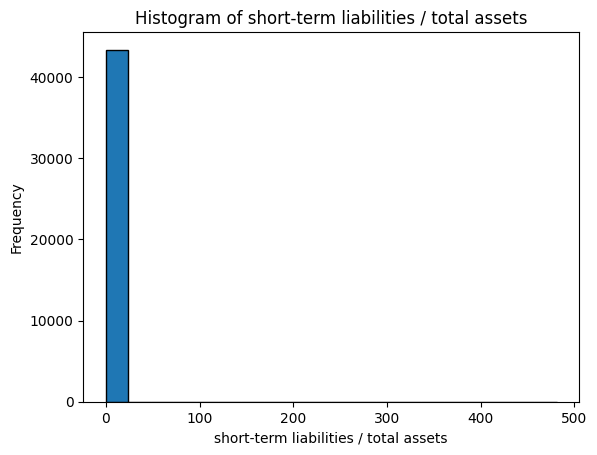

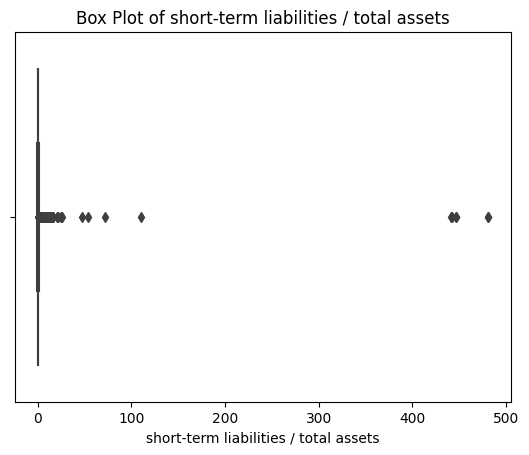



count    43405.000000
mean         0.483521
std          5.437856
min         -0.186610
25%          0.190100
50%          0.341080
75%          0.534630
max        480.960000
Name: short-term liabilities / total assets, dtype: float64


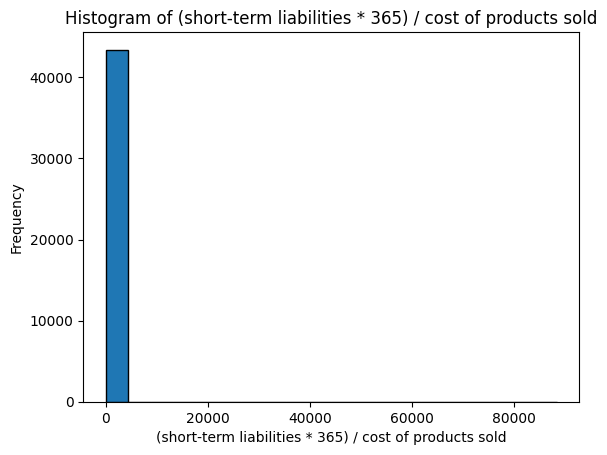

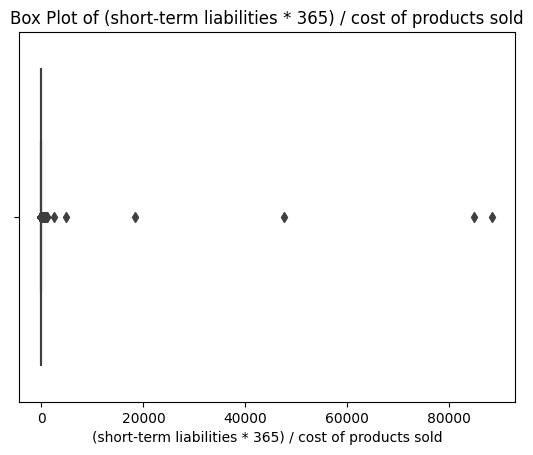



count    43405.000000
mean         6.478459
std        637.664847
min        -25.467000
25%          0.127380
50%          0.215770
75%          0.354540
max      88433.000000
Name: (short-term liabilities * 365) / cost of products sold, dtype: float64


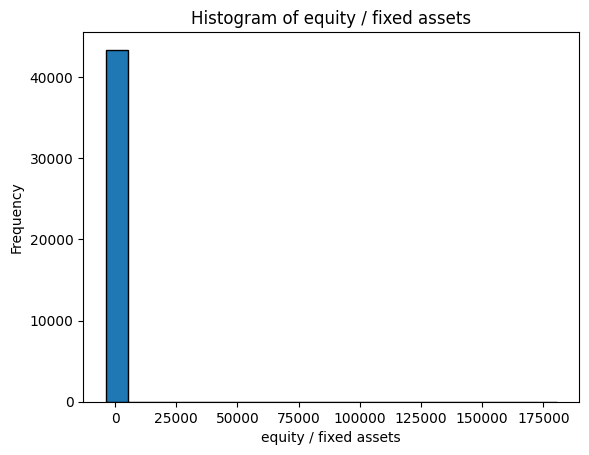

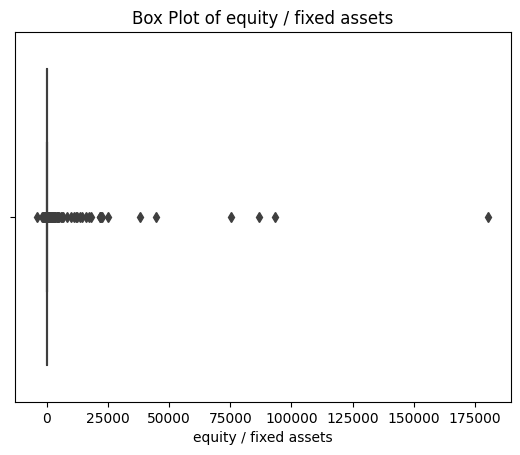



count     43405.000000
mean         23.772623
std        1202.390534
min       -3828.900000
25%           0.697750
50%           1.228600
75%           2.333300
max      180440.000000
Name: equity / fixed assets, dtype: float64


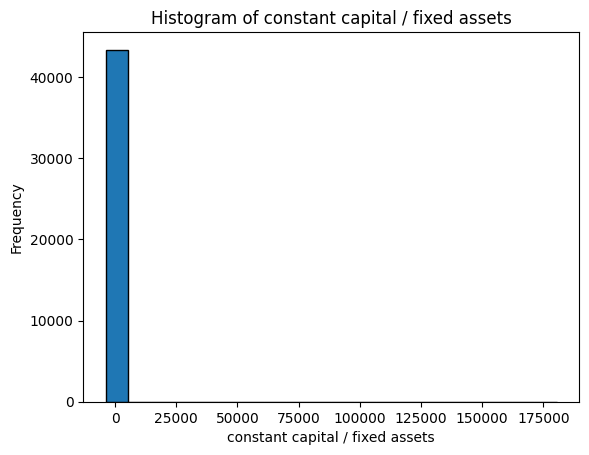

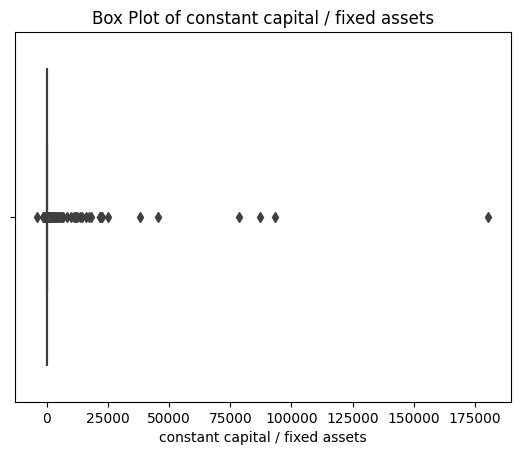



count     43405.000000
mean         24.654700
std        1209.410026
min       -3828.900000
25%           0.963610
50%           1.398000
75%           2.477700
max      180440.000000
Name: constant capital / fixed assets, dtype: float64


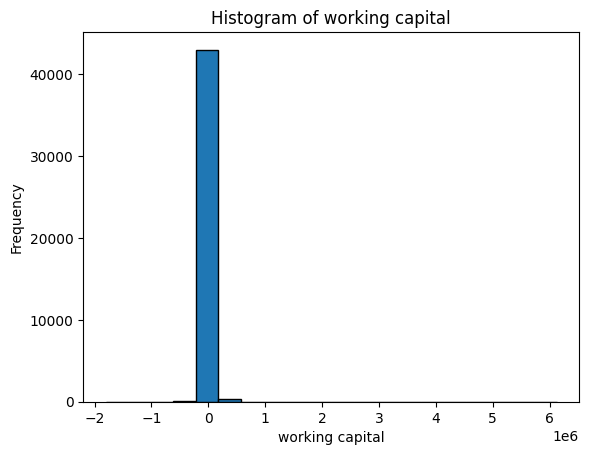

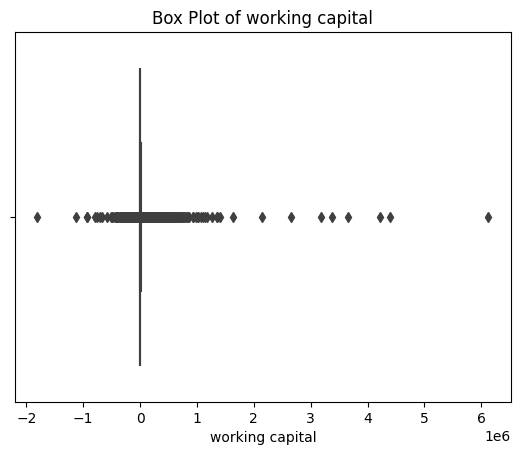



count    4.340500e+04
mean     7.672188e+03
std      7.005229e+04
min     -1.805200e+06
25%      2.757300e+01
50%      1.088400e+03
75%      4.993700e+03
max      6.123700e+06
Name: working capital, dtype: float64


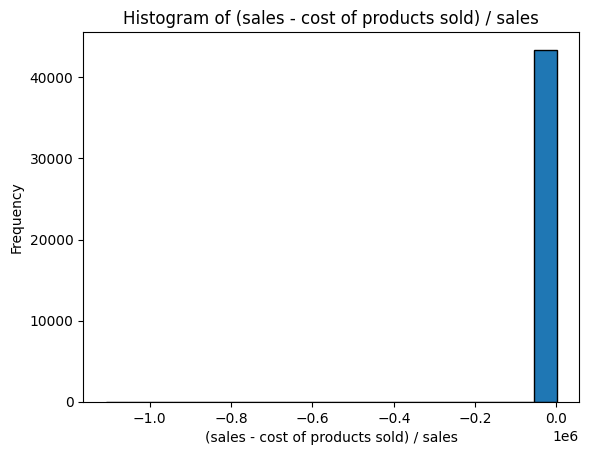

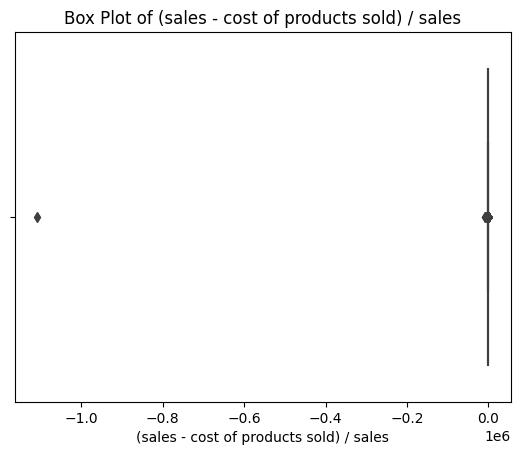



count    4.340500e+04
mean    -2.621959e+01
std      5.320062e+03
min     -1.108300e+06
25%      8.959000e-03
50%      5.270100e-02
75%      1.287800e-01
max      2.931500e+02
Name: (sales - cost of products sold) / sales, dtype: float64


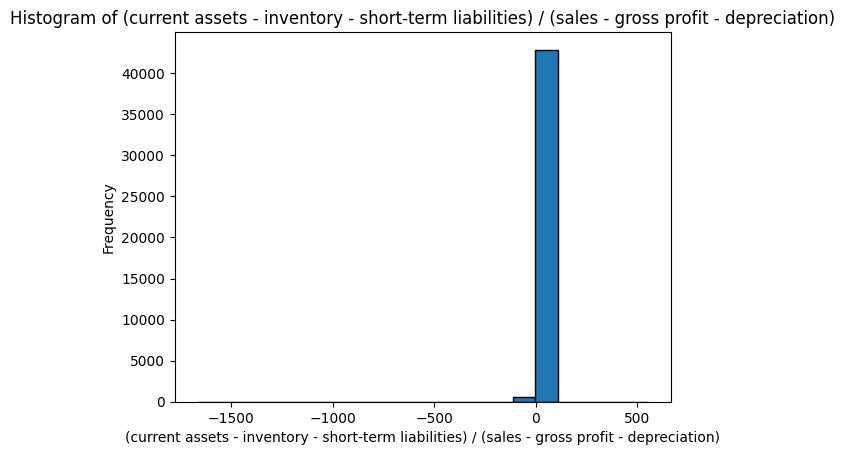

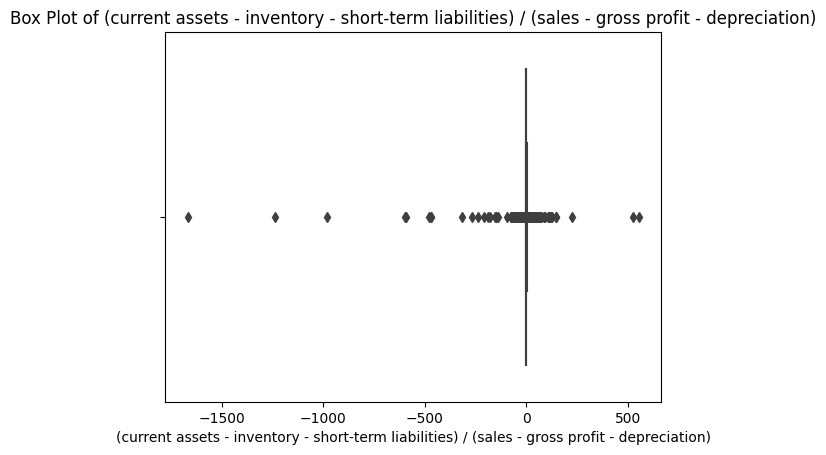



count    43405.000000
mean        -0.010510
std         13.672969
min      -1667.300000
25%          0.014632
50%          0.119650
75%          0.284570
max        552.640000
Name: (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation), dtype: float64


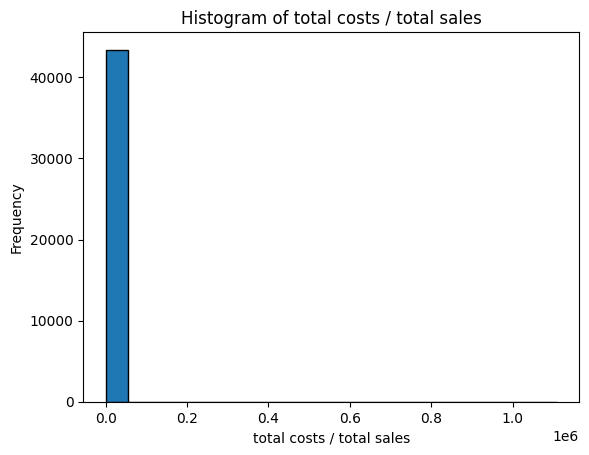

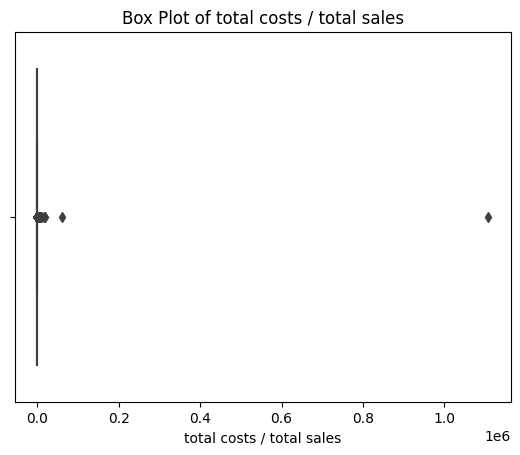



count    4.340500e+04
mean     3.002644e+01
std      5.329289e+03
min     -1.986900e+02
25%      8.755400e-01
50%      9.511200e-01
75%      9.928000e-01
max      1.108300e+06
Name: total costs / total sales, dtype: float64


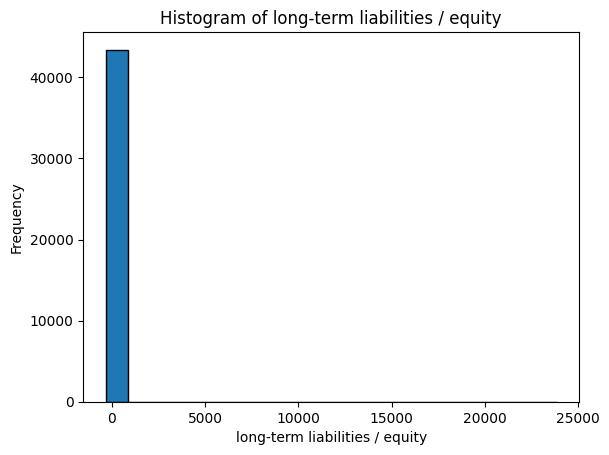

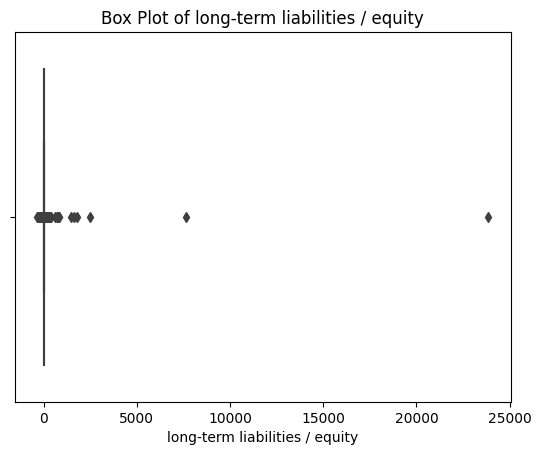



count    43405.000000
mean         1.333288
std        122.094599
min       -327.970000
25%          0.000000
50%          0.006389
75%          0.236280
max      23853.000000
Name: long-term liabilities / equity, dtype: float64


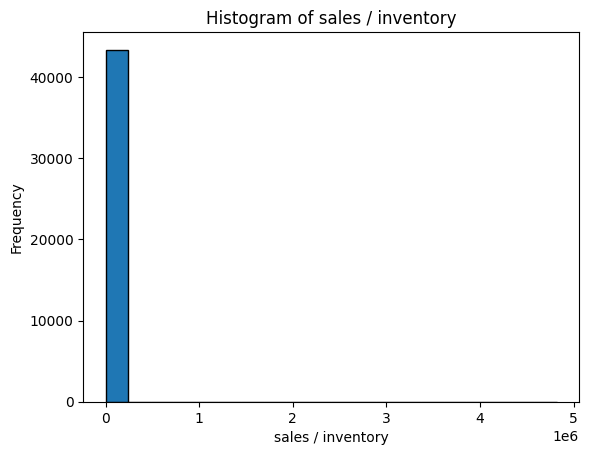

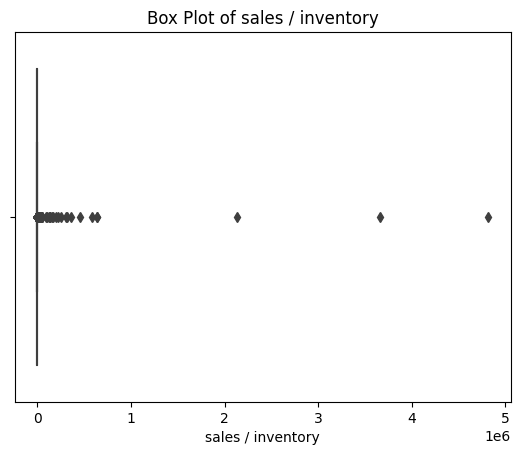



count    4.340500e+04
mean     4.480858e+02
std      3.153355e+04
min     -1.244000e+01
25%      5.729400e+00
50%      1.040000e+01
75%      2.389000e+01
max      4.818700e+06
Name: sales / inventory, dtype: float64


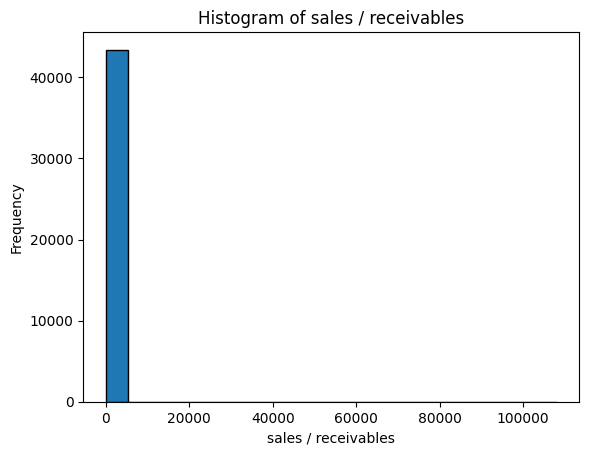

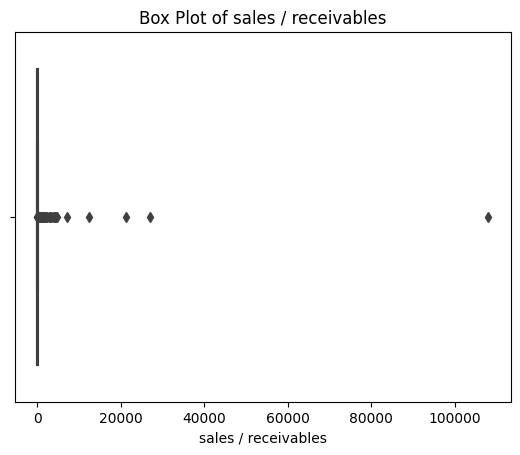



count     43405.000000
mean         17.033202
std         552.399187
min         -12.656000
25%           4.515600
50%           6.649500
75%          10.443000
max      108000.000000
Name: sales / receivables, dtype: float64


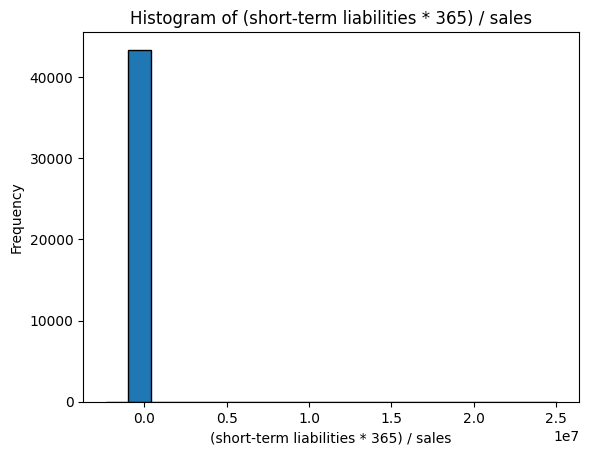

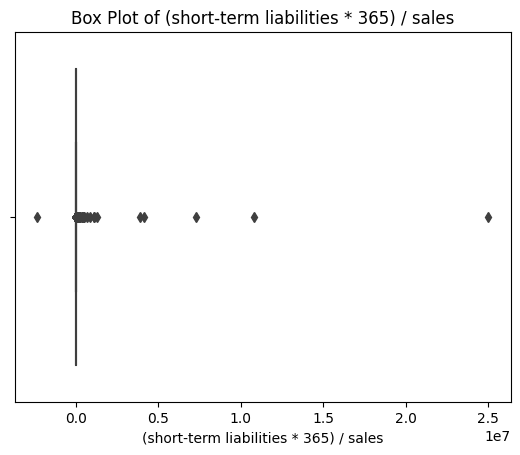



count    4.340500e+04
mean     1.502328e+03
std      1.390628e+05
min     -2.336500e+06
25%      4.220500e+01
50%      7.153500e+01
75%      1.177400e+02
max      2.501600e+07
Name: (short-term liabilities * 365) / sales, dtype: float64


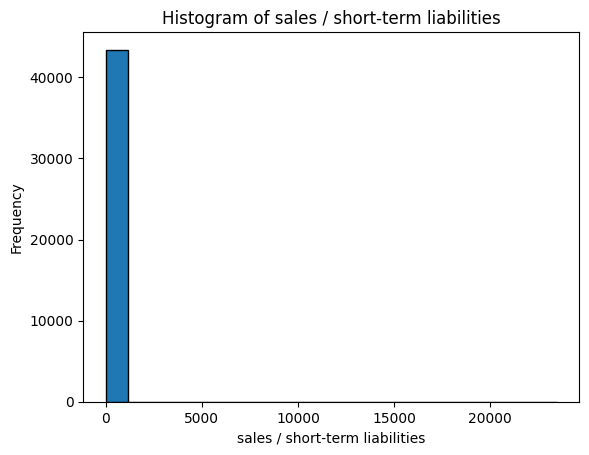

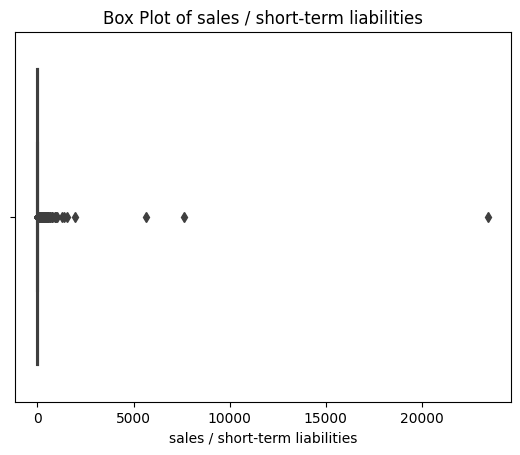



count    43405.000000
mean         9.343074
std        123.985521
min         -1.543200
25%          3.100200
50%          5.102900
75%          8.650900
max      23454.000000
Name: sales / short-term liabilities, dtype: float64


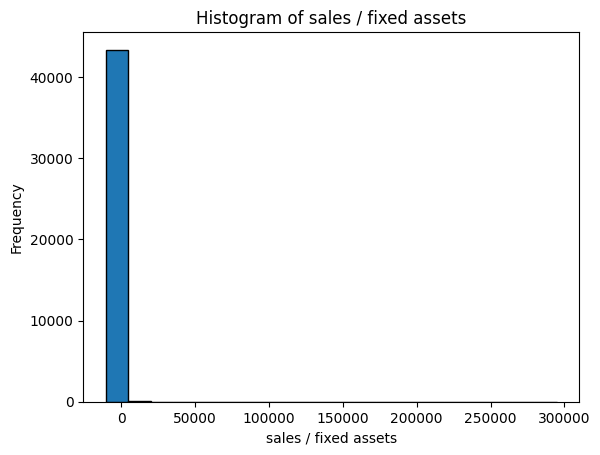

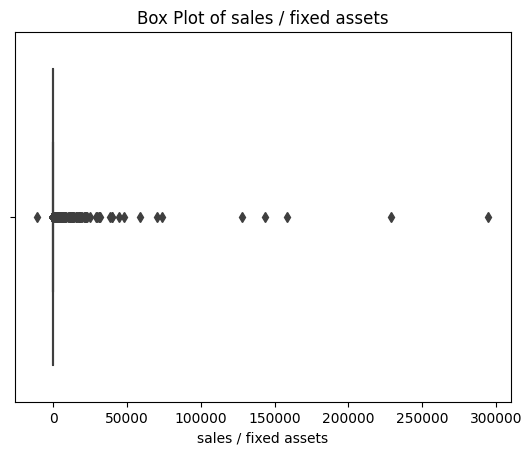



count     43405.000000
mean         72.788592
std        2347.072100
min      -10677.000000
25%           2.207800
50%           4.389200
75%          10.461000
max      294770.000000
Name: sales / fixed assets, dtype: float64


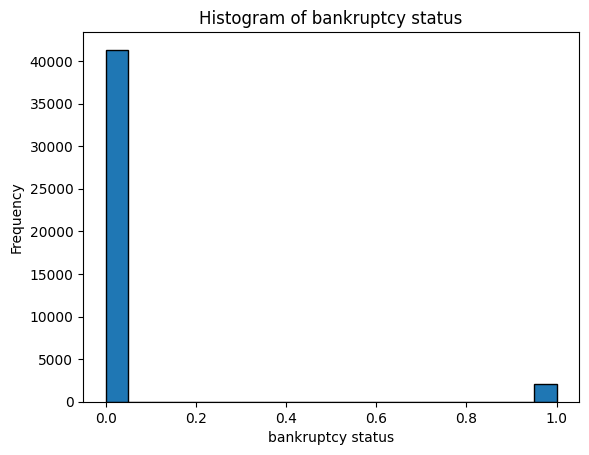

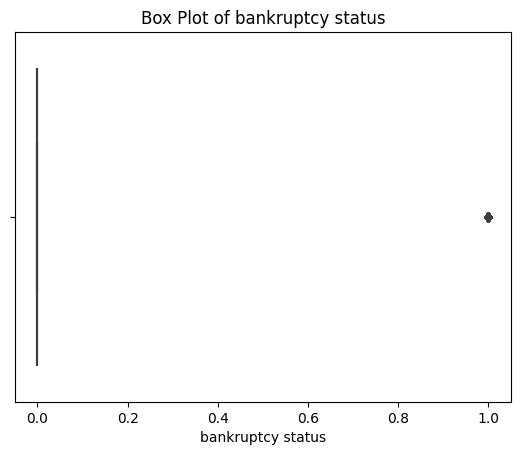



count    43405.000000
mean         0.048174
std          0.214137
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: bankruptcy status, dtype: float64


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [23]:
list(map(lambda col: univariate_analysis(all_data_reset, col), formula))

## Bivariante analysis


In [24]:
def scatterplo(data,feature):
    plt.scatter(data[feature], data['bankruptcy status'])  # Replace 'target_variable' with your actual target column
    plt.xlabel(feature)
    plt.ylabel('Target Variable')
    plt.title(f'Scatter Plot: {feature} vs. Target Variable')
    plt.show()

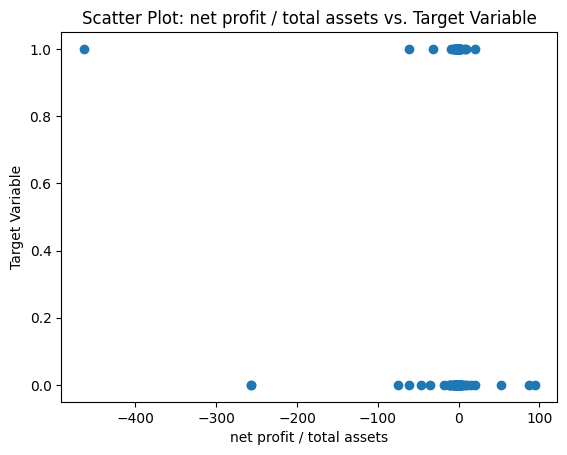

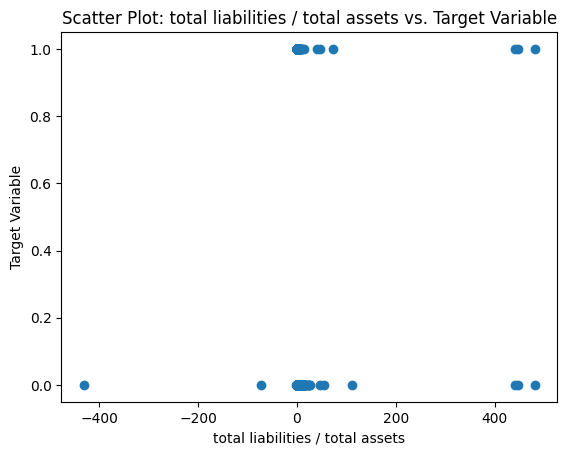

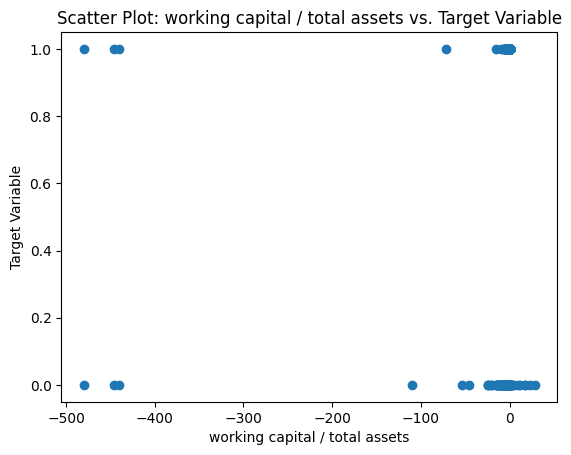

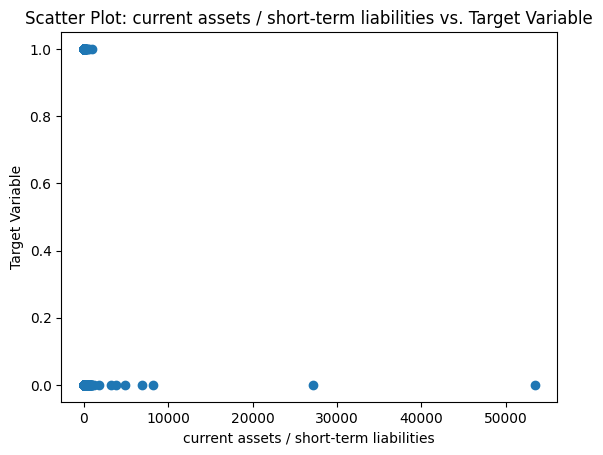

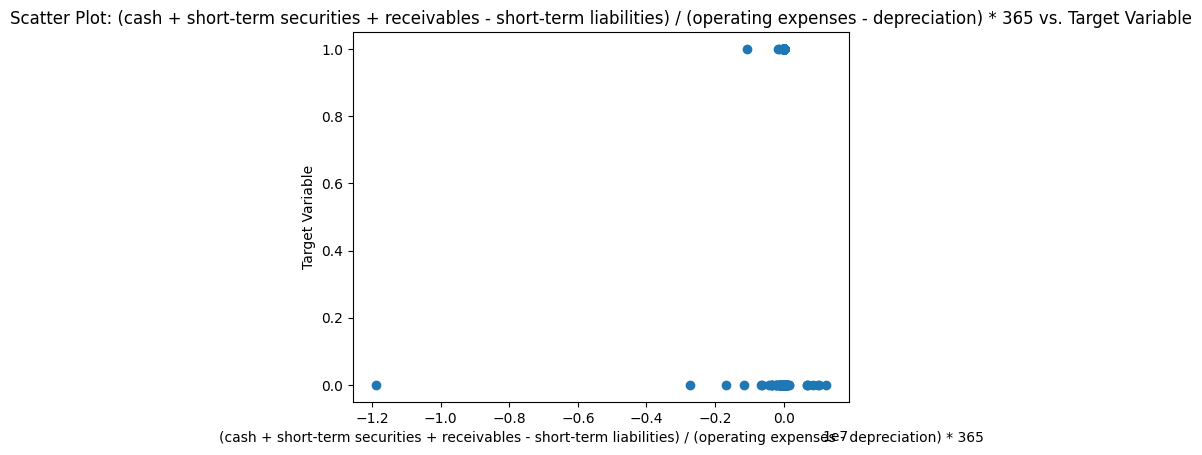

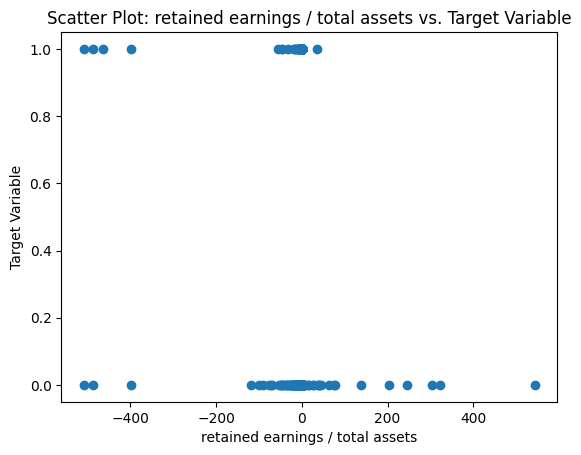

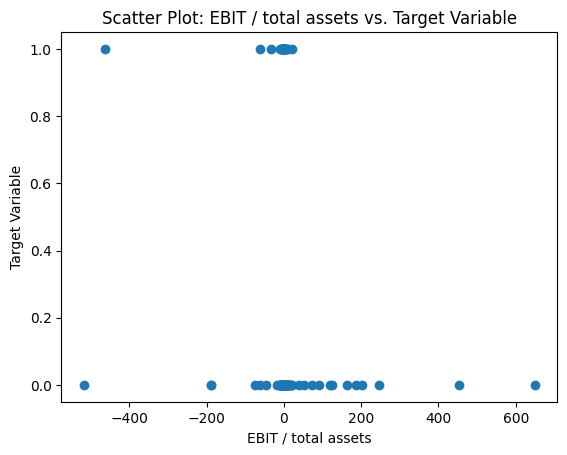

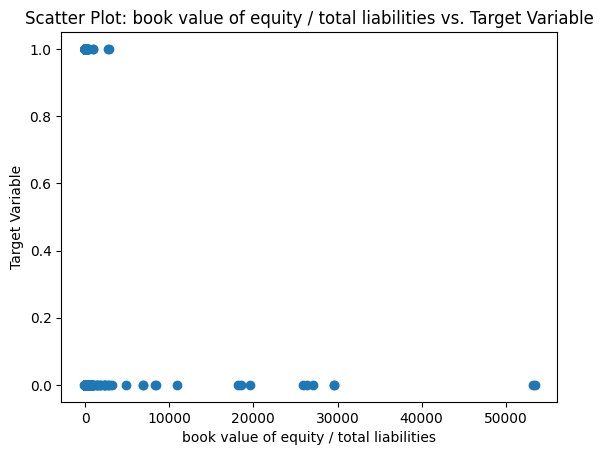

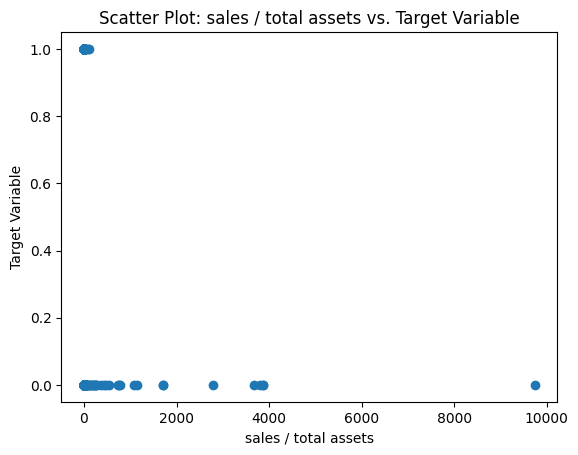

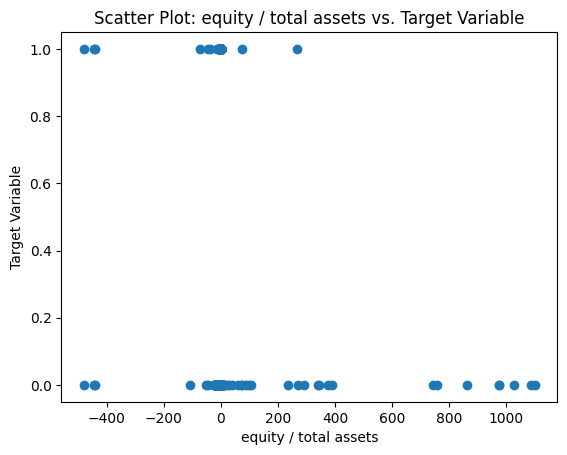

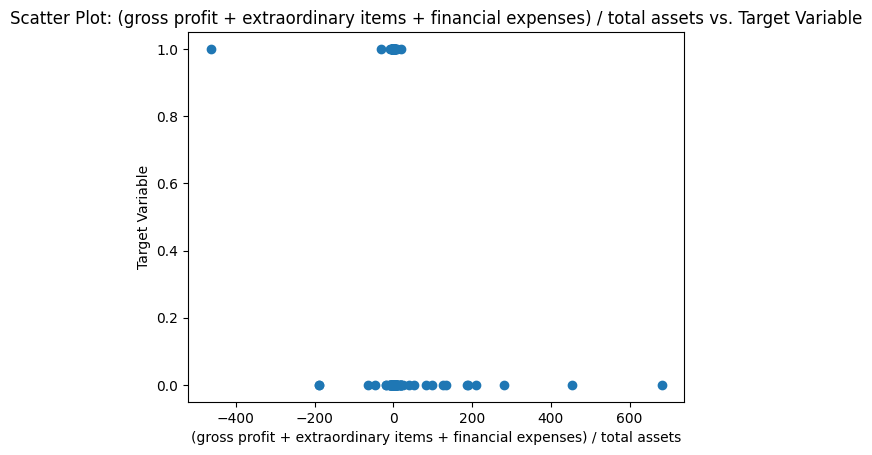

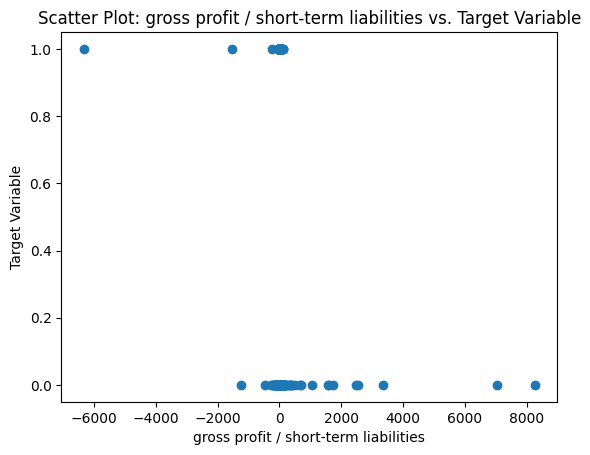

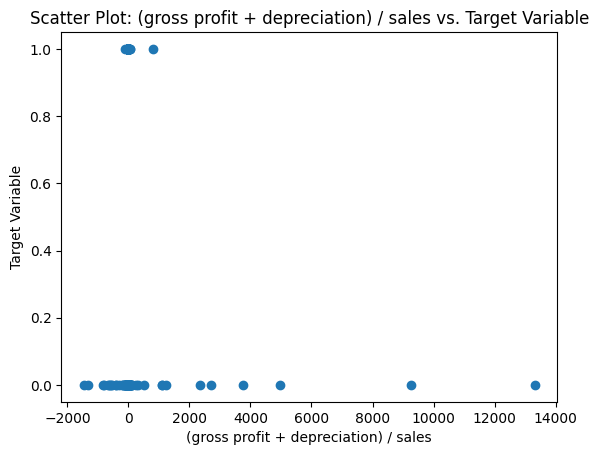

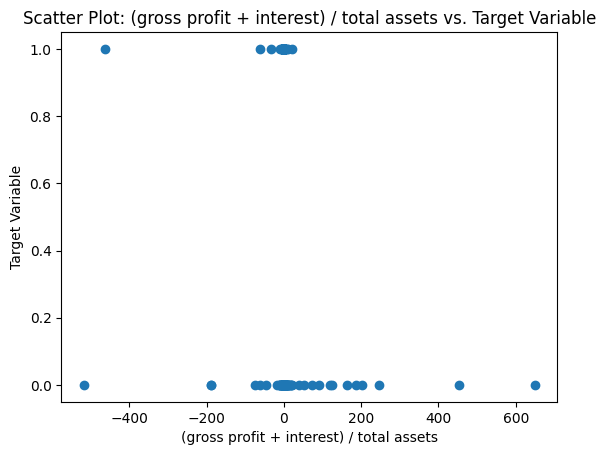

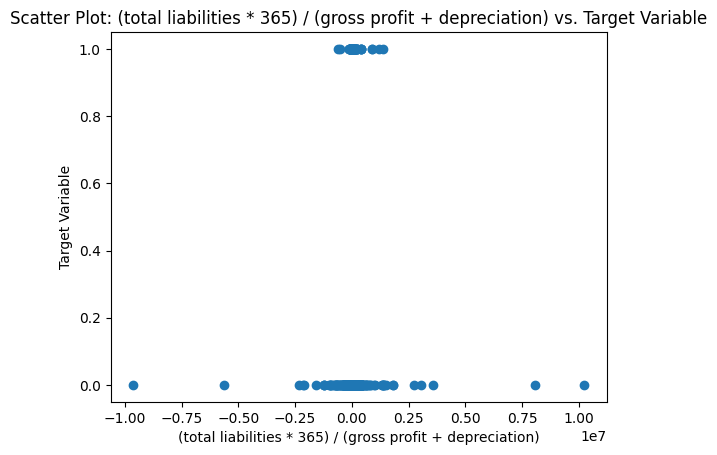

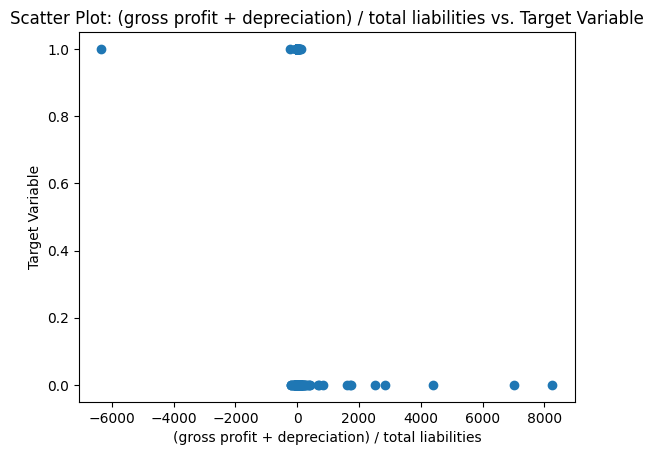

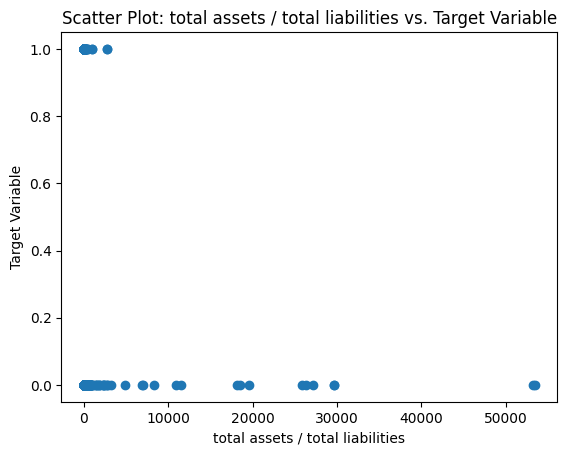

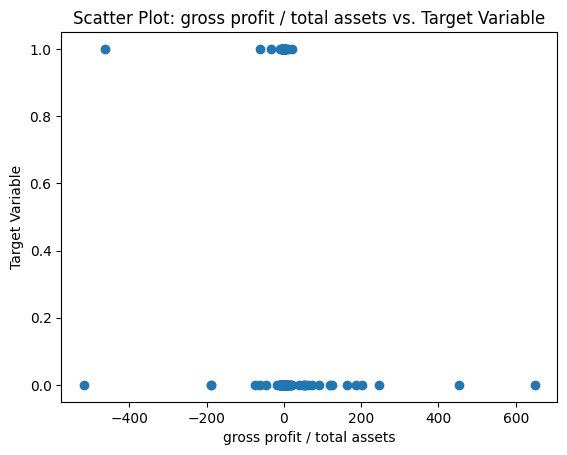

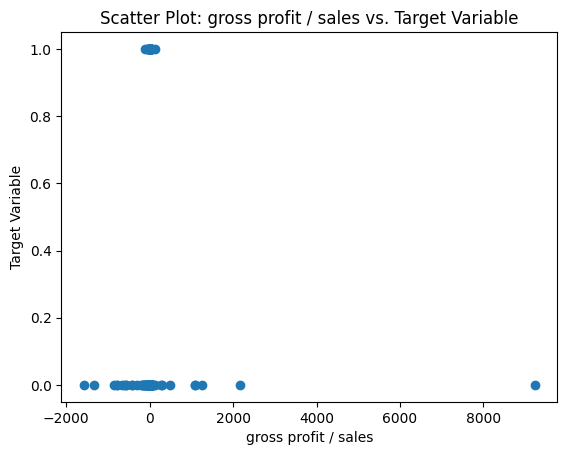

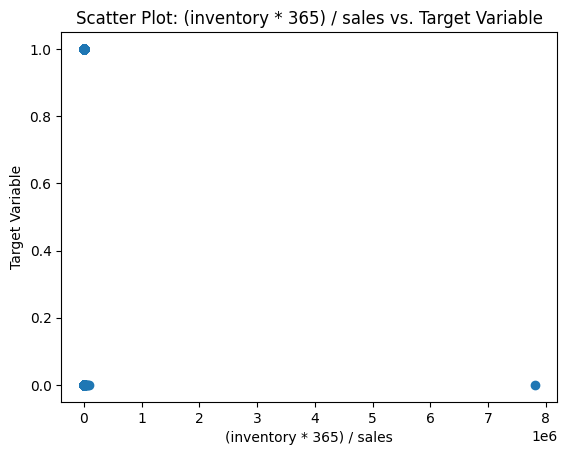

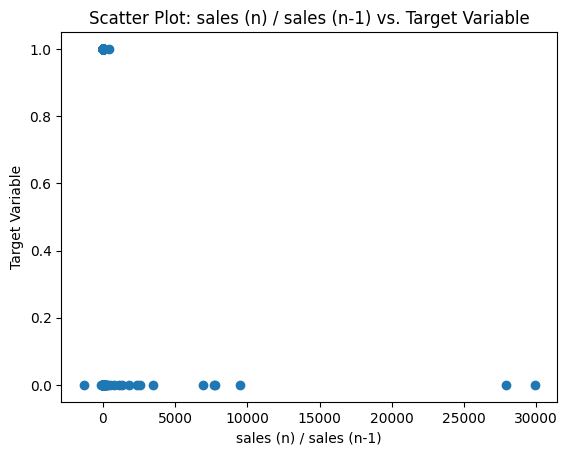

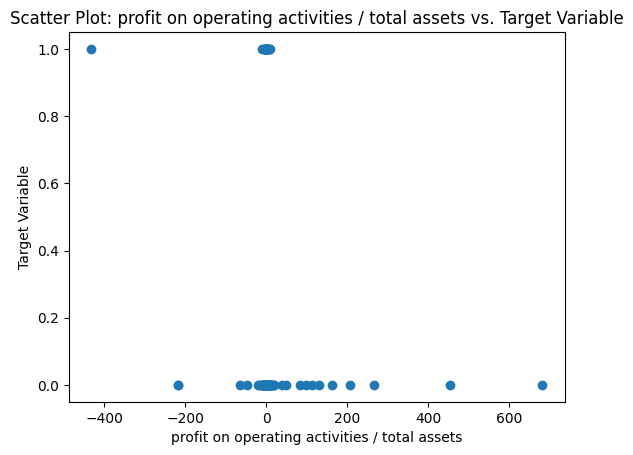

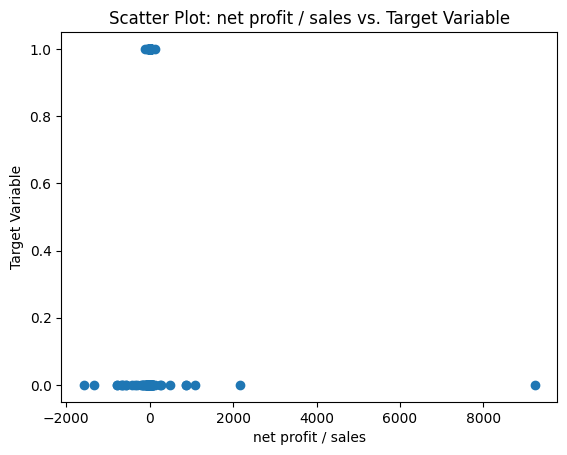

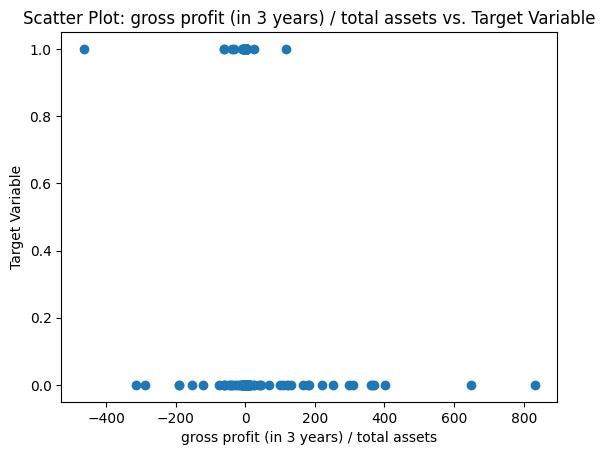

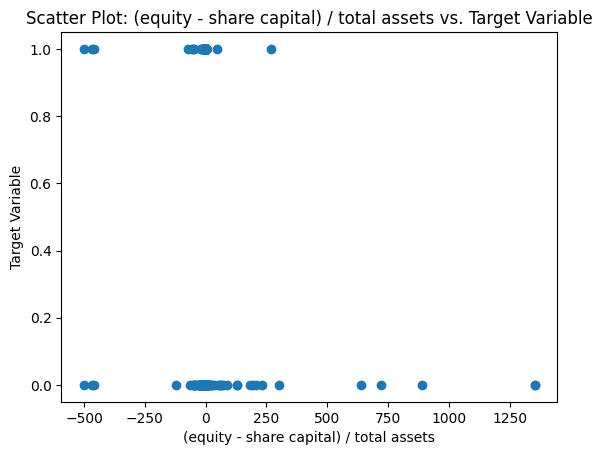

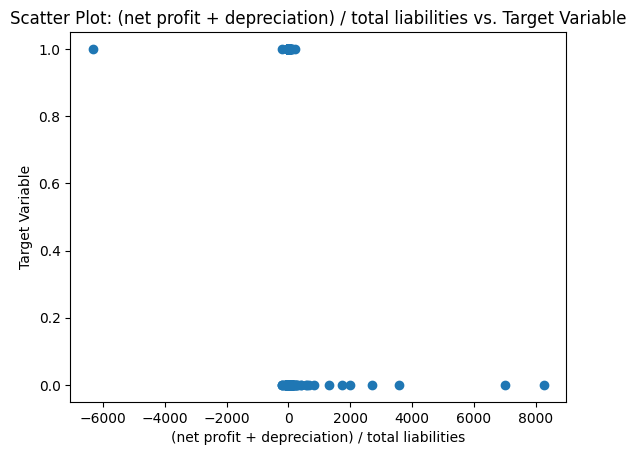

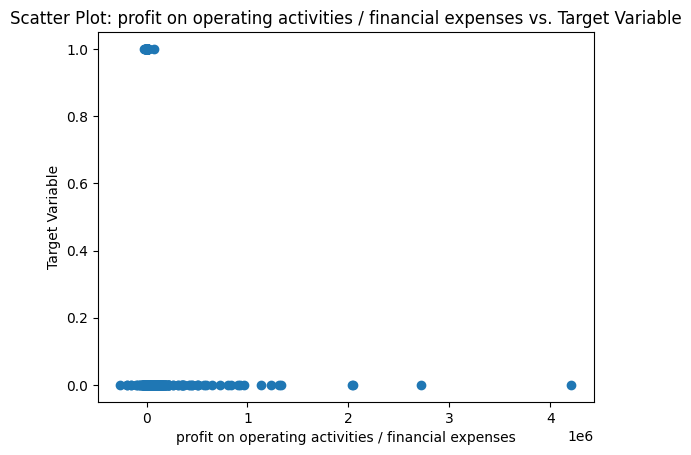

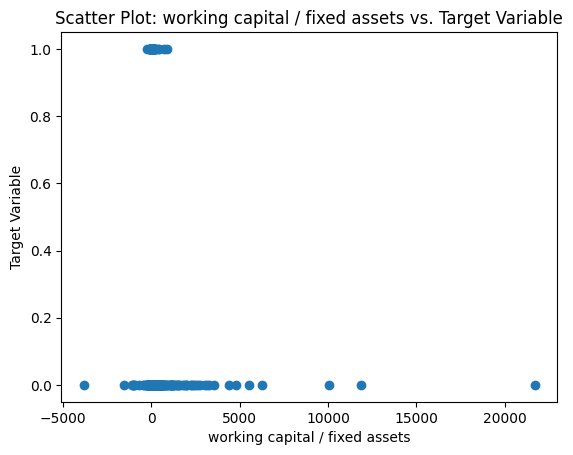

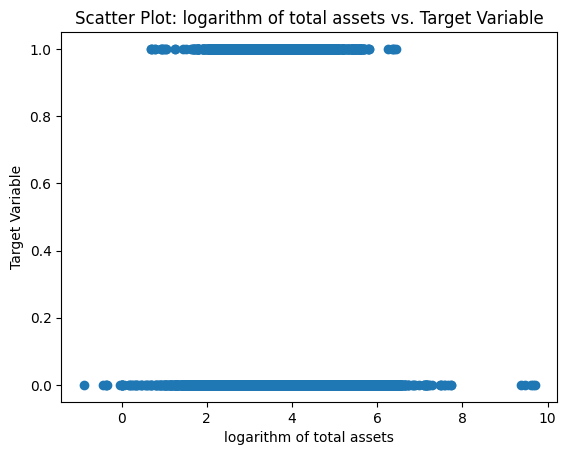

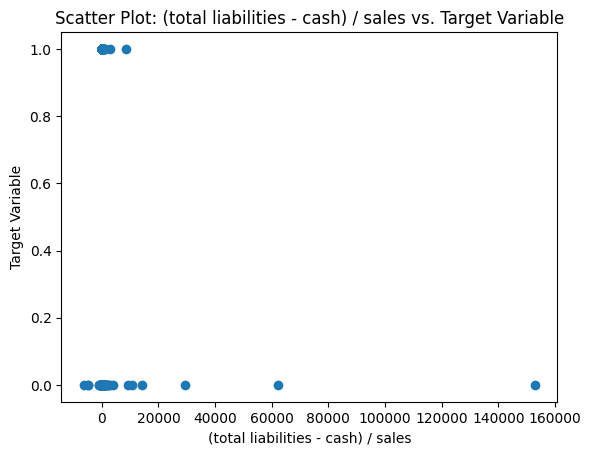

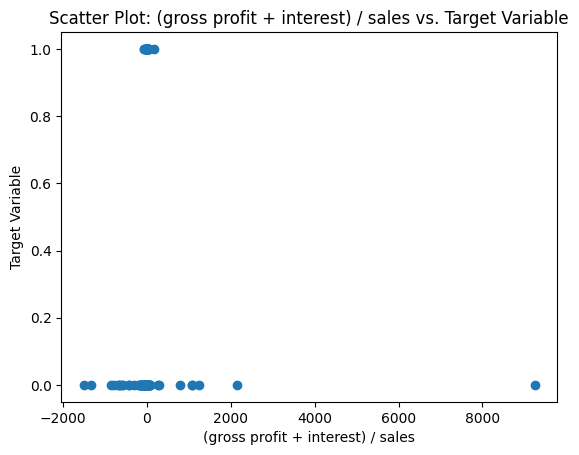

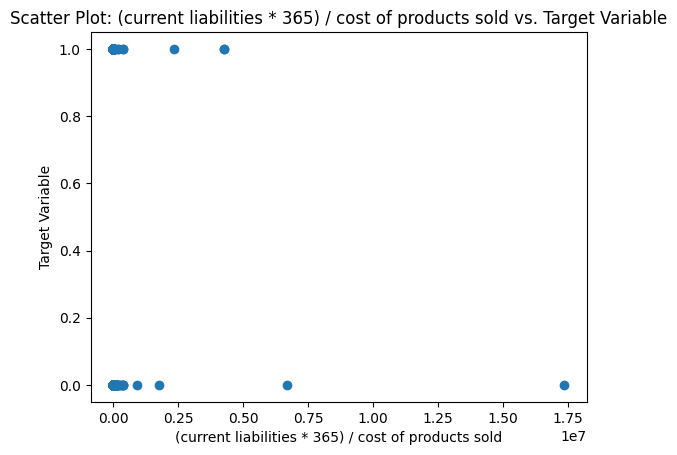

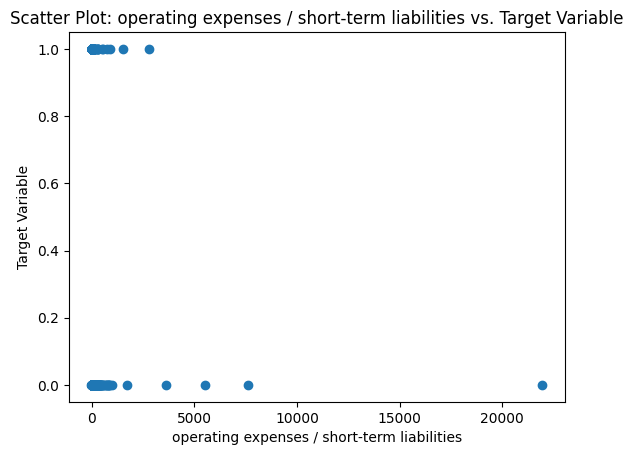

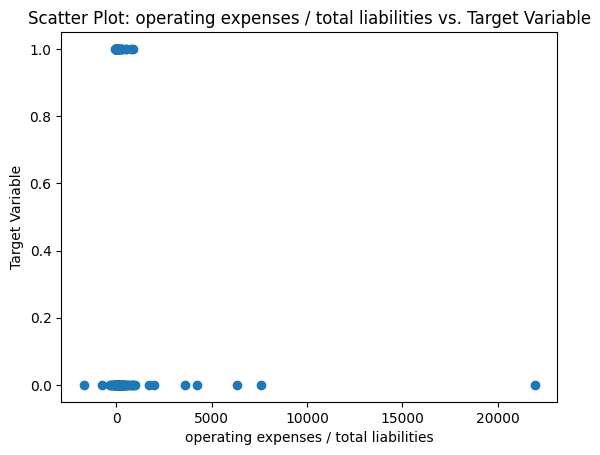

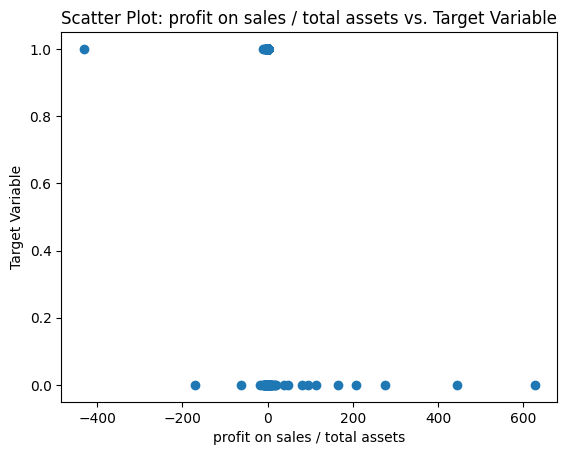

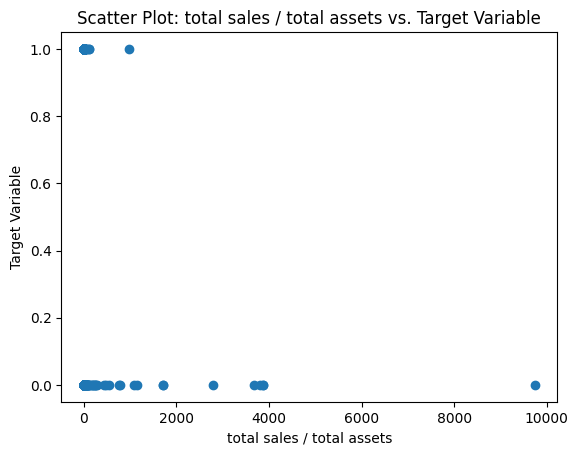

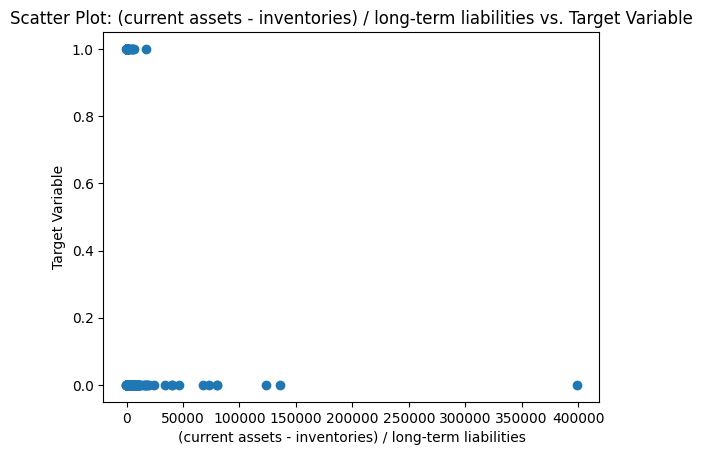

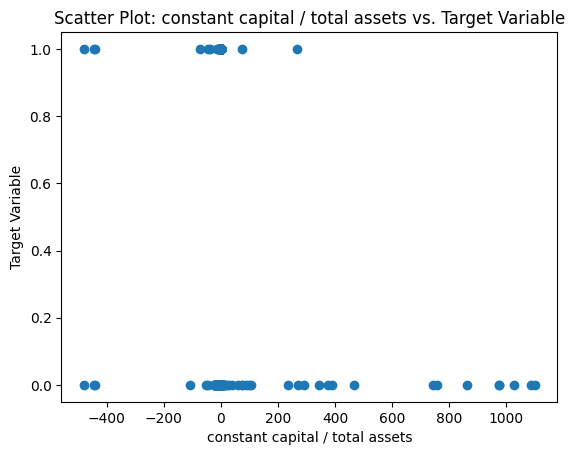

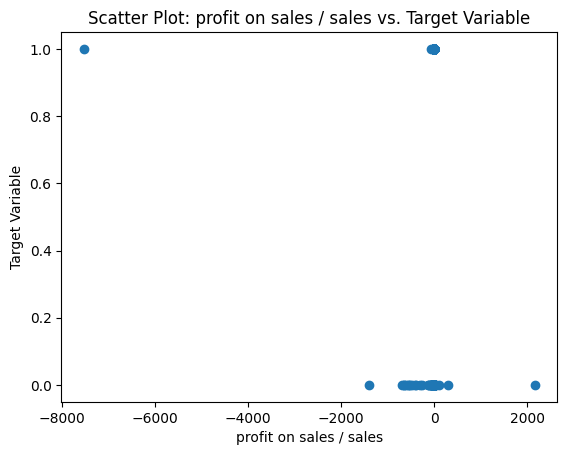

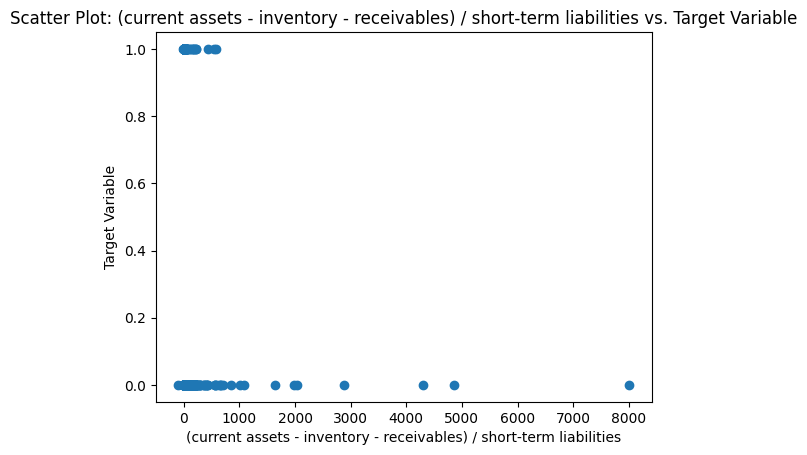

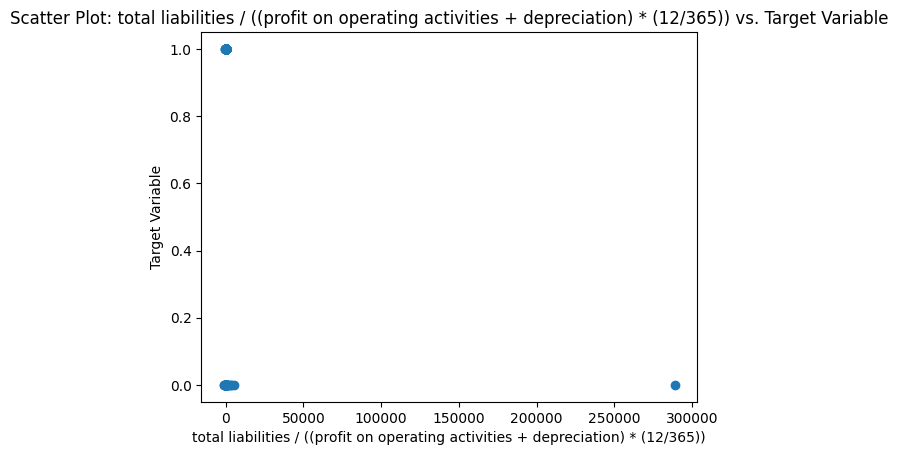

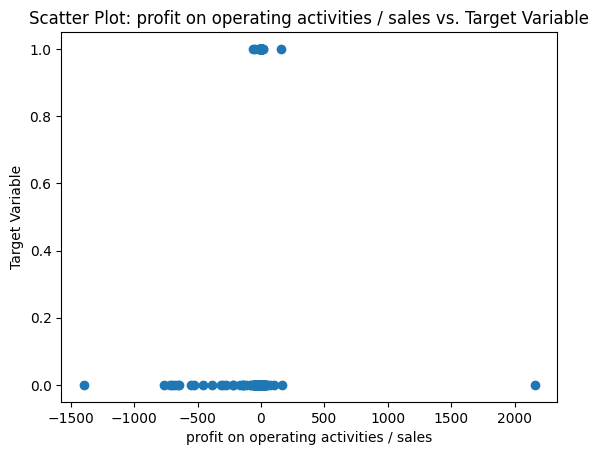

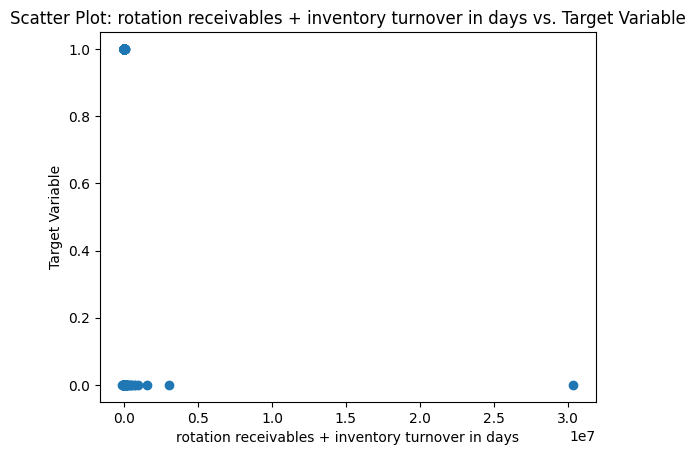

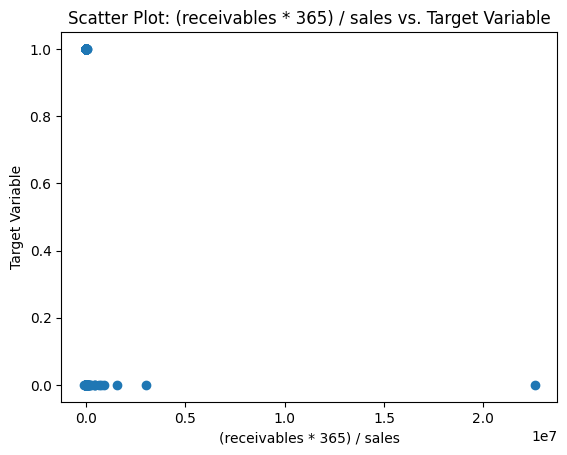

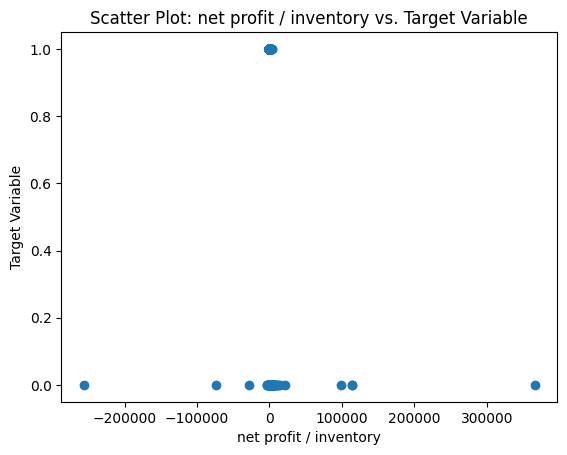

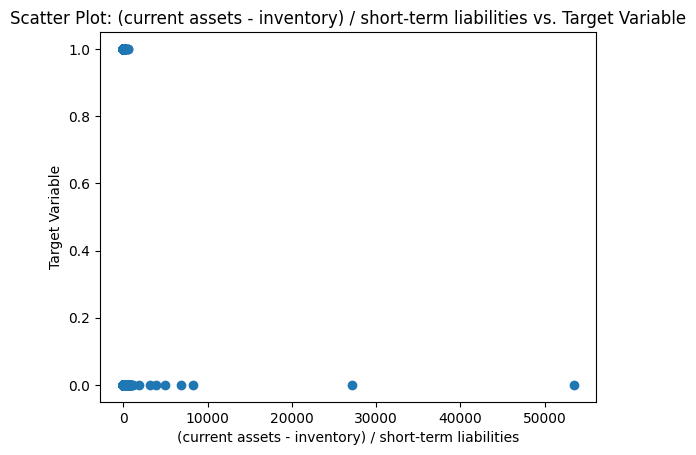

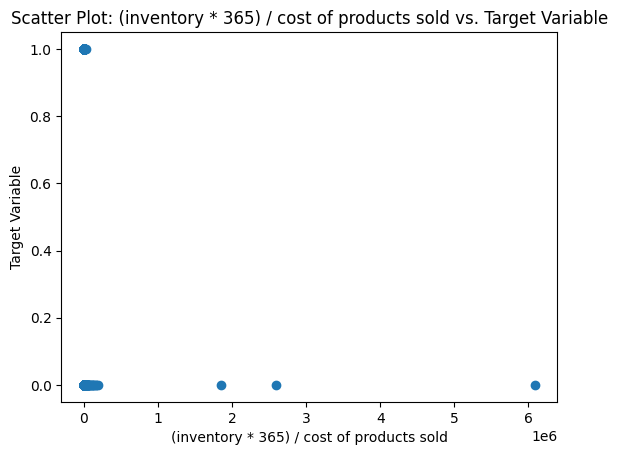

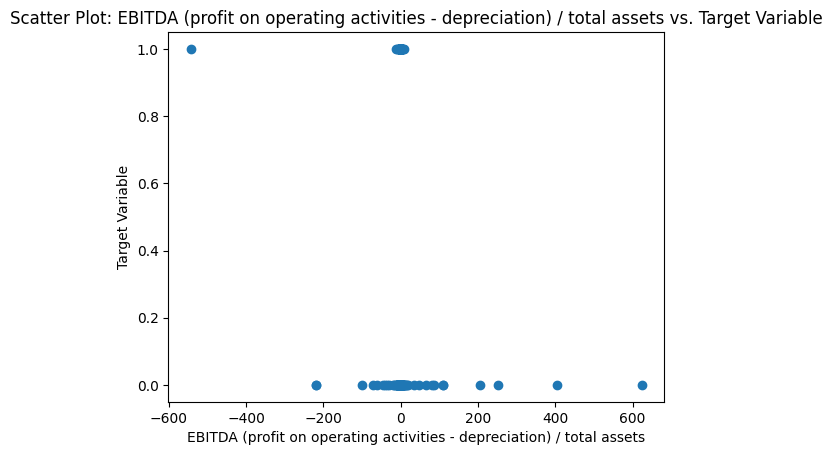

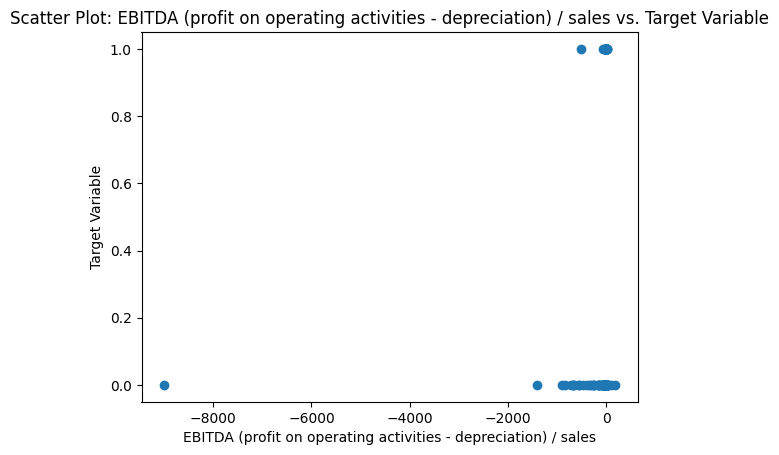

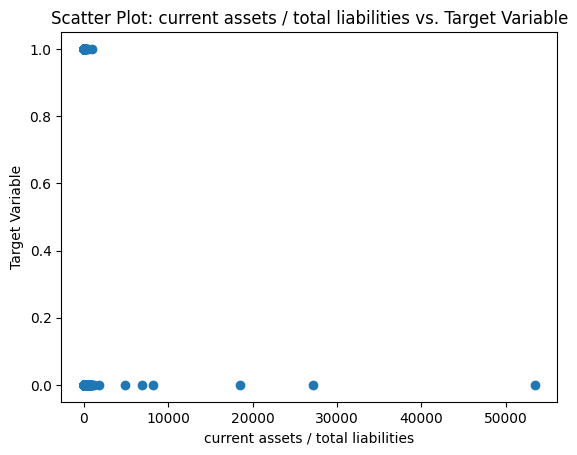

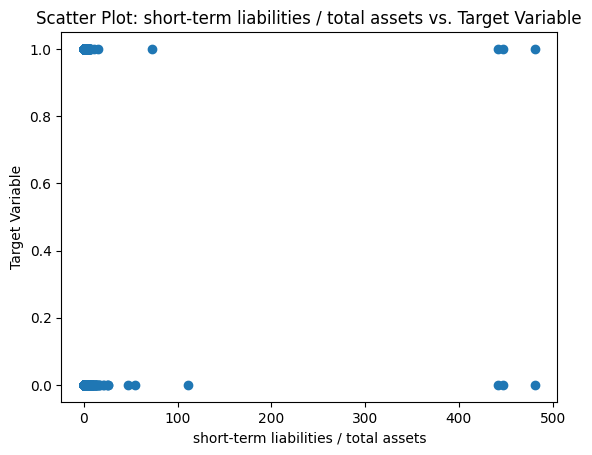

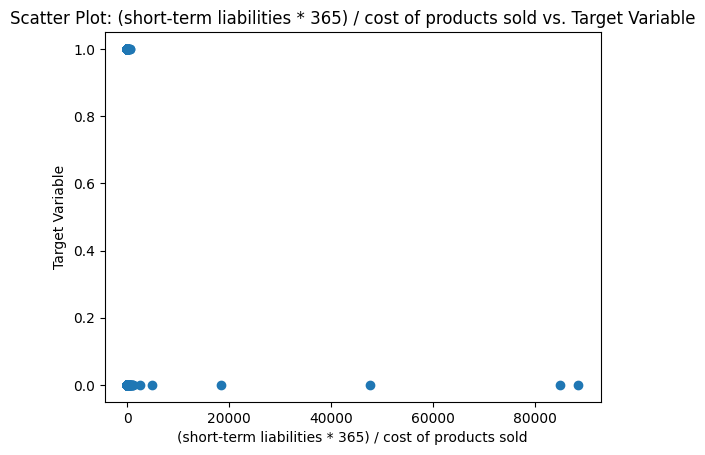

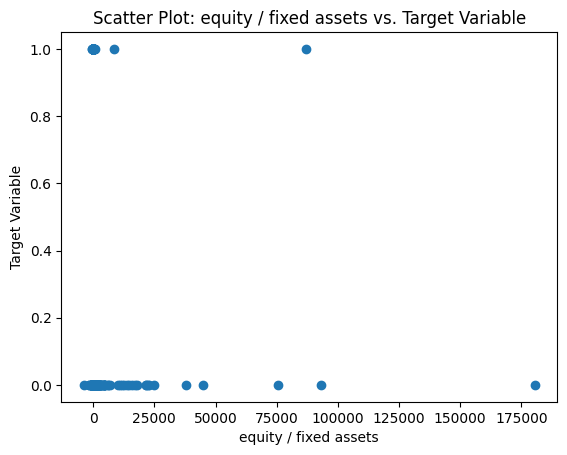

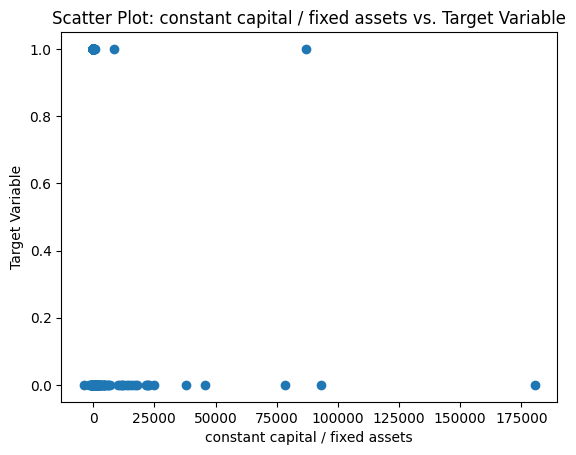

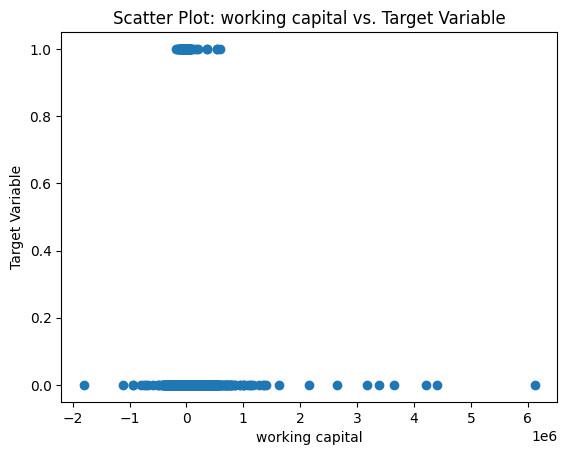

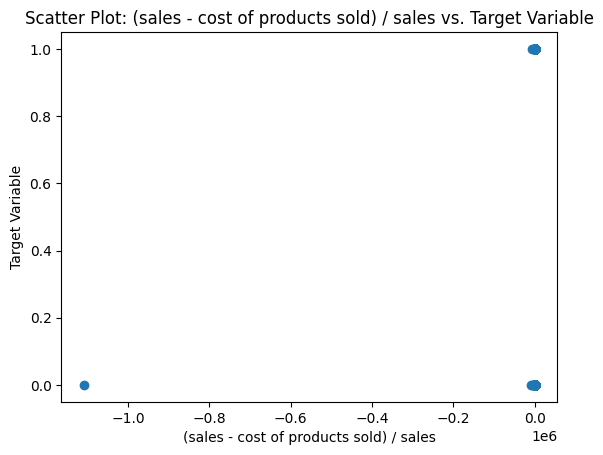

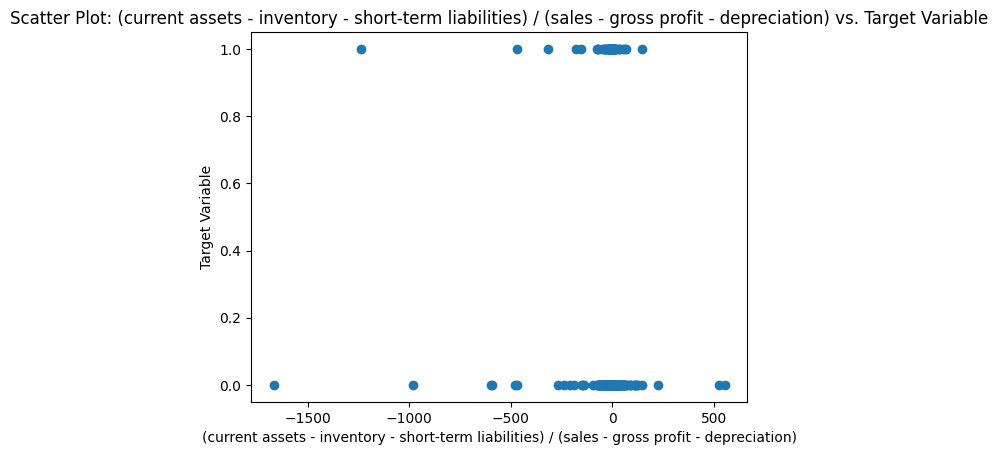

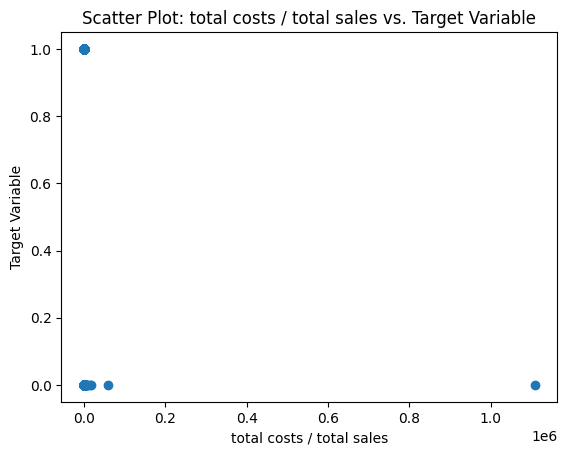

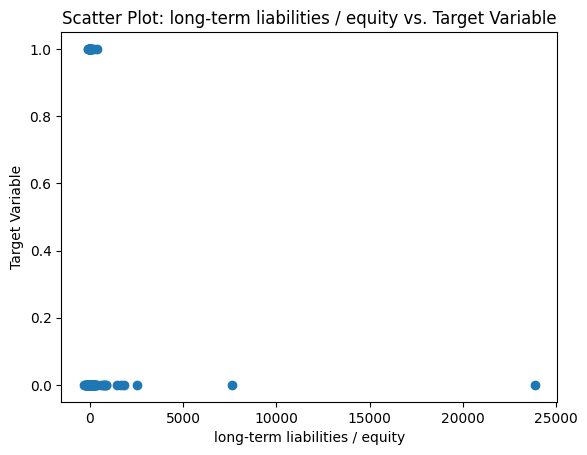

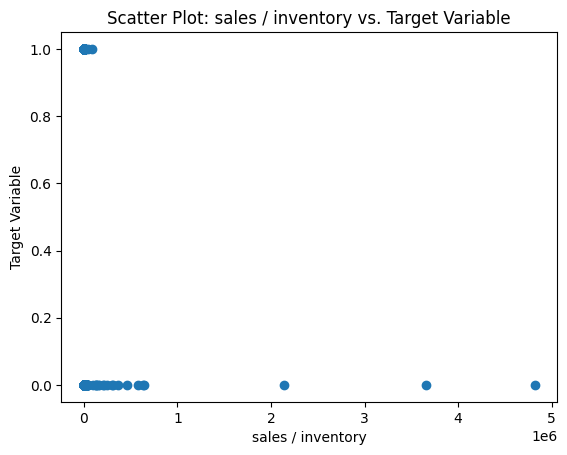

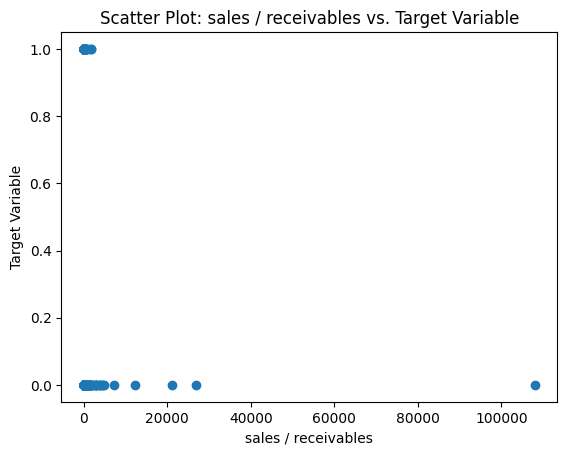

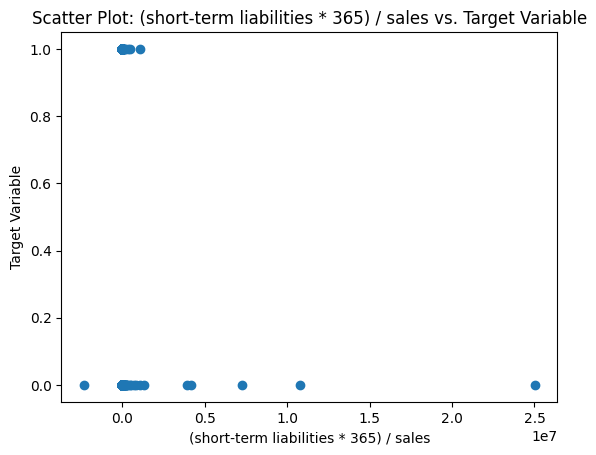

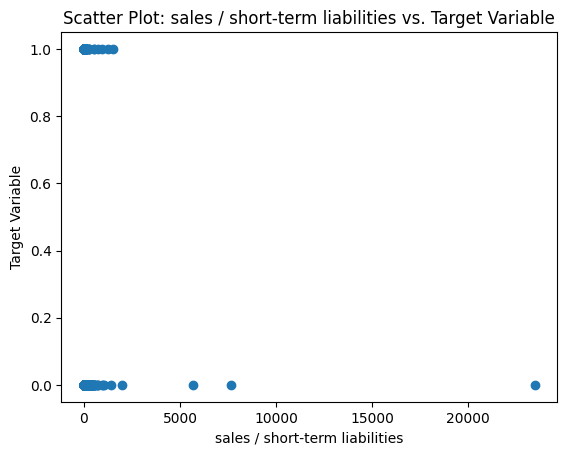

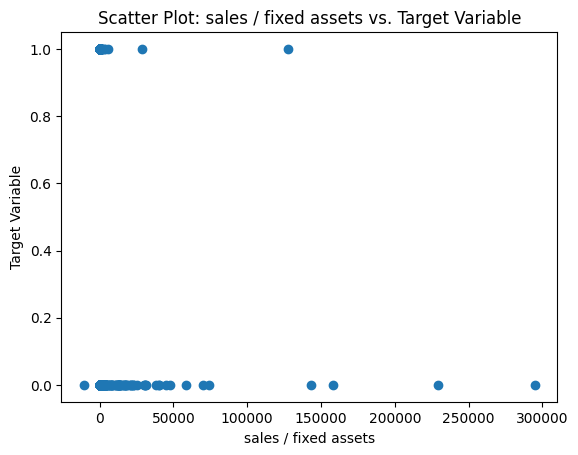

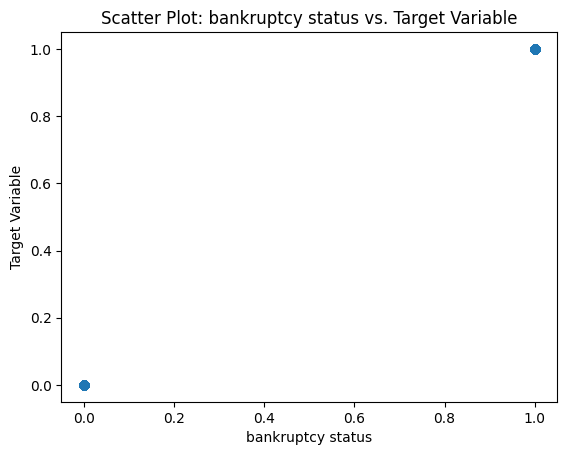

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [25]:
list(map(lambda col: scatterplo(all_data_reset, col), formula))

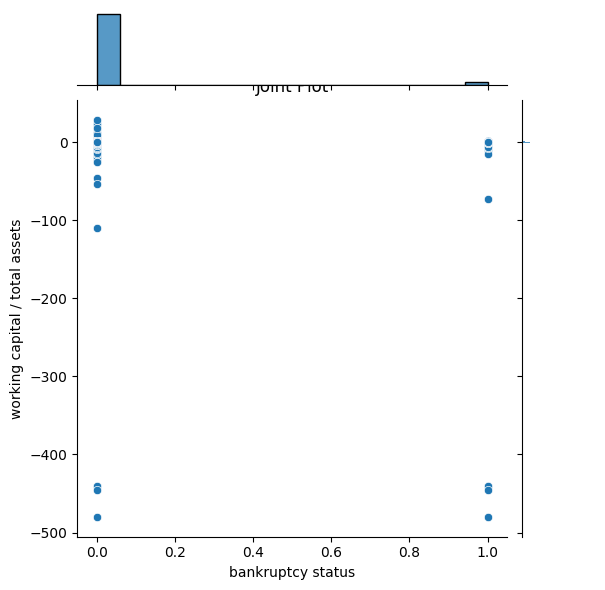

In [26]:
sns.jointplot(x="bankruptcy status", y= 'working capital / total assets', data=all_data_reset, kind='scatter')
plt.title('Joint Plot')
plt.show()

### PCA: principale components analysis


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
 all_data_reset.drop('bankruptcy status', axis=1), all_data_reset['bankruptcy status'], test_size=0.3,
random_state=0)


In [30]:
pca = PCA(n_components=None)

In [32]:
pca.fit(X_train)

PCA()

In [33]:
train_t = pca.transform(X_train)
test_t = pca.transform(X_test)

Text(0, 0.5, 'Percentage of Variance Explained')

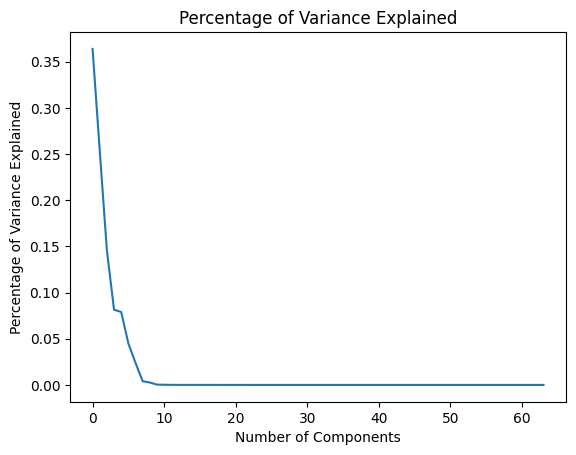

In [34]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Percentage of Variance Explained')
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Variance Explained')

he preceding plot indicates that we can use the first ten components to train our machine
learning models using a linear model.

###Features selections


In [ ]:
all_data_reset.columns

Index(['net profit / total assets', 'total liabilities / total assets',
       'working capital / total assets',
       'current assets / short-term liabilities',
       '(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation) * 365',
       'retained earnings / total assets', 'EBIT / total assets',
       'book value of equity / total liabilities', 'sales / total assets',
       'equity / total assets',
       '(gross profit + extraordinary items + financial expenses) / total assets',
       'gross profit / short-term liabilities',
       '(gross profit + depreciation) / sales',
       '(gross profit + interest) / total assets',
       '(total liabilities * 365) / (gross profit + depreciation)',
       '(gross profit + depreciation) / total liabilities',
       'total assets / total liabilities', 'gross profit / total assets',
       'gross profit / sales', '(inventory * 365) / sales',
       'sales (n) / sales (n-1)',
       'profit

In [ ]:
X = all_data_reset.drop("bankruptcy status",axis=1)
y = all_data_reset["bankruptcy status"]

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

ValueError: ignored

In [ ]:
print(model.feature_importances_)

In [ ]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

In [ ]:
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

In [ ]:
X_train.corr()

In [ ]:
plt.figure(figsize=(100,100))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

In [ ]:
corr_features

In [ ]:
X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [ ]:
data_type_counts = all_data_reset.dtypes.value_counts()

# Create a pie chart
plt.figure(figsize=(4, 5))
plt.pie(data_type_counts, labels=data_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title("Distribution of Data Types for Features")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###Information Gain


In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
mutual_info=mutual_info_classif(X,y)

In [ ]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

In [ ]:

def correlatio2(dataset,min_threseloed, max_thresloed):
                     corr_matrix = dataset.corr()
                     mask = (corr_matrix < max_thresloed) & (corr_matrix >min_threseloed)
                     high_corr_values = corr_matrix[mask]
                     printed_pairs = set()

                     for col1, col2 in high_corr_values.stack().index:
                          correlation = high_corr_values.loc[col1, col2]
                          # Check if the reverse pair has already been printed
                          if (col2, col1) not in printed_pairs:
                              printed_pairs.add((col1, col2))
                              print(f"Columns: {col1} and {col2}, Correlation: {correlation:.4f}")

In [ ]:
correlatio2(all_data_reset,0.85,1)

In [ ]:
correlatio2(all_data_reset,-1,-0.9)

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(all_data_reset.corr(),cmap=plt.cm.Reds,annot=True)
